# Price Prediction

Problem Statement:


---


## Imports


In [6]:
import pandas as pd
import numpy as np
from glob import glob
import warnings
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
import re
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor, VotingRegressor, BaggingRegressor

---


#### Warning Suppresion


In [7]:
warnings.filterwarnings('ignore')

#### Defining the File Path


In [8]:
file_path = "experimental/merged-tm-fb.csv"

---


## Exploration


In [9]:
final_df = pd.read_csv(file_path)
# final_df.drop(final_df.columns[0], axis=1, inplace=True)
final_df

,Unnamed: 0,name,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,dateOfBirth,age,nationality,height,foot,joinedOn,signedFrom,contract,marketValue,status
0,0,Aaron Cresswell,ENG,DF,West Ham,eng Premier League,35-086,1989.0,13.0,6.0,...,1989-12-15,35,['England'],170.0,left,2014-07-03,Ipswich Town,2025-06-30,700000.0,NaN
1,1,Aaron Ramsdale,ENG,GK,Southampton,eng Premier League,26-301,1998.0,20.0,20.0,...,1998-05-14,26,['England'],190.0,right,2024-08-30,Arsenal FC,2028-06-30,20000000.0,NaN
2,2,Aarón Martín,ESP,DF,Genoa,it Serie A,27-323,1997.0,27.0,27.0,...,1997-04-22,27,['Spain'],178.0,left,2023-07-03,1.FSV Mainz 05,2026-06-30,5000000.0,NaN
3,3,Abakar Sylla,CIV,DF,Strasbourg,fr Ligue 1,22-076,2002.0,16.0,9.0,...,2002-12-25,22,"[""Cote d'Ivoire""]",188.0,left,2023-07-15,Club Brugge KV,2028-06-30,12000000.0,NaN
4,4,Abdallah Sima,SEN,"FW,MF",Brest,fr Ligue 1,23-267,2001.0,20.0,10.0,...,2001-06-17,23,['Senegal'],188.0,right,2024-08-21,Brighton & Hove Albion,2025-06-30,10000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,2088,Óscar Perea,COL,MF,Strasbourg,fr Ligue 1,19-165,2005.0,1.0,0.0,...,2005-09-27,19,['Colombia'],174.0,right,2024-07-02,Atlético Nacional,2029-06-30,2500000.0,NaN
2089,2089,Óscar Valentín,ESP,MF,Rayo Vallecano,es La Liga,30-203,1994.0,26.0,14.0,...,1994-08-20,30,['Spain'],177.0,right,2019-07-01,CF Rayo Majadahonda,2027-06-30,3500000.0,Team captain
2090,2090,Óscar de Marcos,ESP,DF,Athletic Club,es La Liga,35-331,1989.0,21.0,13.0,...,1989-04-14,35,['Spain'],182.0,right,2009-07-01,: Ablöse €300k,2025-06-30,1500000.0,Team captain
2091,2091,Ørjan Nyland,NOR,GK,Sevilla,es La Liga,34-182,1990.0,20.0,20.0,...,1990-09-10,34,['Norway'],192.0,right,2023-08-20,RB Leipzig,2026-06-30,1000000.0,NaN


In [10]:
list(final_df.columns)

['Unnamed: 0',
 'name',
 'Nation',
 'Pos',
 'Squad',
 'Comp',
 'Age',
 'Born',
 'MP',
 'Starts',
 'Min',
 '90s',
 'GA',
 'GA90',
 'SoTA',
 'Saves',
 'Save%',
 'W',
 'D',
 'L',
 'CS',
 'CS%',
 'PKatt',
 'PKA',
 'PKsv',
 'PKm',
 'Save%.1',
 'Mn/MP',
 'Min%',
 'Mn/Start',
 'Compl',
 'Subs',
 'Mn/Sub',
 'unSub',
 'PPM',
 'onG',
 'onGA',
 '+/-',
 '+/-90',
 'On-Off',
 'onxG',
 'onxGA',
 'xG+/-',
 'xG+/-90',
 'On-Off.1',
 'CrdY',
 'CrdR',
 '2CrdY',
 'Fls',
 'Fld',
 'Off',
 'Crs',
 'Int',
 'TklW',
 'PKwon',
 'PKcon',
 'OG',
 'Recov',
 'Won',
 'Lost',
 'Won%',
 'Tkl',
 'TklW_defense',
 'Def 3rd',
 'Mid 3rd',
 'Att 3rd',
 'Tkl.1',
 'Att',
 'Tkl%',
 'Lost_defense',
 'Blocks',
 'Sh',
 'Pass',
 'Int_defense',
 'Tkl+Int',
 'Clr',
 'Err',
 'Cmp',
 'Att_passing',
 'Cmp%',
 'TotDist',
 'PrgDist',
 'Cmp.1',
 'Att.1',
 'Cmp%.1',
 'Cmp.2',
 'Att.2',
 'Cmp%.2',
 'Cmp.3',
 'Att.3',
 'Cmp%.3',
 'Ast',
 'xAG',
 'xA',
 'A-xAG',
 'KP',
 '1/3',
 'PPA',
 'CrsPA',
 'PrgP',
 'Gls',
 'G+A',
 'G-PK',
 'PK',
 'xG',
 '

In [11]:
final_df.describe()

,Unnamed: 0,Born,MP,Starts,Min,90s,GA,GA90,SoTA,Saves,...,PrgDist_possession,1/3_possession,CPA,Mis,Dis,Rec,id,age,height,marketValue
count,2093.000000,2090.000000,2093.000000,2093.000000,1948.000000,1949.000000,160.000000,160.0000,160.000000,160.000000,...,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,2.093000e+03,2093.000000,2073.000000,2.079000e+03
mean,1046.000000,1998.038756,15.076923,11.011467,1062.177105,11.795639,19.925000,1.4960,59.562500,39.825000,...,945.547741,12.772587,4.951745,15.253080,9.225873,419.841889,4.441978e+05,26.177258,183.537868,1.240890e+07
std,604.341377,4.542647,8.746226,8.665875,707.743672,7.867261,14.961817,0.6806,44.145797,30.117913,...,836.809861,13.819741,9.249758,15.308407,10.637526,334.421961,2.670859e+05,4.546301,6.707890,1.860226e+07
min,0.000000,1982.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.333000e+03,16.000000,163.000000,2.500000e+04
25%,523.000000,1995.000000,7.000000,3.000000,414.000000,4.600000,7.000000,1.0800,18.000000,11.750000,...,277.000000,2.000000,0.000000,3.000000,1.000000,144.000000,2.410760e+05,23.000000,179.000000,2.000000e+06
50%,1046.000000,1998.000000,17.000000,10.000000,1008.500000,11.200000,18.000000,1.4250,50.000000,32.000000,...,736.000000,8.000000,1.000000,11.000000,5.000000,359.500000,3.952360e+05,26.000000,184.000000,5.000000e+06
75%,1569.000000,2001.000000,23.000000,18.000000,1646.250000,18.300000,32.000000,1.8400,99.000000,67.250000,...,1406.250000,19.000000,5.000000,23.000000,14.000000,606.250000,6.163690e+05,29.000000,188.000000,1.500000e+07
max,2092.000000,2008.000000,29.000000,29.000000,2610.000000,29.000000,58.000000,4.5800,160.000000,115.000000,...,5654.000000,86.000000,102.000000,91.000000,75.000000,2198.000000,1.310513e+06,42.000000,204.000000,2.000000e+08


---


## Filtering into smaller datasets


In [12]:
final_df['position'].unique()

array(['Left-Back', 'Goalkeeper', 'Centre-Back', 'Right Winger',
       'Left Winger', 'Central Midfield', 'Defensive Midfield',
       'Centre-Forward', 'Right-Back', 'Attacking Midfield',
       'Second Striker', 'Right Midfield', 'Left Midfield'], dtype=object)

In [13]:
def split_by_position(csv_path: str = None, df=None):
    """
    Reads a CSV file and splits the DataFrame into four DataFrames based on the 'position' column.

    - Rows with 'Back' in the position are added to the defenders DataFrame.
    - Rows with 'Midfield' in the position are added to the midfielders DataFrame.
    - Rows with 'Goalkeeper' in the position are added to the goalkeepers DataFrame.
    - Rows with 'Winger' or 'Forward' in the position are added to the forwards DataFrame.

    Parameters:
        csv_path (str): Path to the CSV file.

    Returns:
        tuple: A tuple of DataFrames in the order (defenders_df, midfielders_df, goalkeepers_df, forwards_df).
    """
    if csv_path:
        df = pd.read_csv(csv_path)

    df['position'] = df['position'].astype(str)

    defenders_df = df[df['position'].str.contains(
        "Back", case=False, na=False)].copy()
    midfielders_df = df[df['position'].str.contains(
        "Midfield", case=False, na=False)].copy()
    goalkeepers_df = df[df['position'].str.contains(
        "Goalkeeper", case=False, na=False)].copy()
    forwards_df = df[
        df['position'].str.contains("Winger", case=False, na=False) |
        df['position'].str.contains("Forward", case=False, na=False)
    ].copy()

    return defenders_df, midfielders_df, goalkeepers_df, forwards_df


df, mf, gk, fw = split_by_position(file_path)

print("Defenders shape:", df.shape)
print("Midfielders shape:", mf.shape)
print("Goalkeepers shape:", gk.shape)
print("Forwards shape:", fw.shape)

Defenders shape: (712, 219)
Midfielders shape: (597, 219)
Goalkeepers shape: (244, 219)
Forwards shape: (522, 219)


---


## General Functions


In [26]:
# def clean_data_basic(df):
#     missing_percentage = df.isnull().sum() / len(df) * 100
#     df = df.loc[:, missing_percentage <= 80]
#     drop_cols = ["name", "id", "Unnamed: 0", "Age", "Pos", "Born", "status", "signedFrom"]

#     for col in df.columns:
#         if df[col].dtype in ['int64', 'float64']:
#             if missing_percentage[col] < 5:
#                 df[col] = df[col].fillna(df[col].median())
#             else:
#                 df[col] = df[col].fillna(df[col].mean())
#         elif df[col].dtype == 'object':
#             df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')
#         elif np.issubdtype(df[col].dtype, np.datetime64):
#             df[col] = df[col].fillna(pd.Timestamp('1970-01-01'))

#     df.columns = [re.sub(r"[^a-zA-Z0-9_/% ]", "_", col) for col in df.columns]

#     df['marketValue'] = pd.to_numeric(df['marketValue'], errors='coerce')
#     df.drop(columns=drop_cols, inplace=True, errors="ignore")
#     df = df.reset_index(drop=True)

#     df["contract_length"] = (
#         pd.to_datetime(df["contract"]) - pd.to_datetime(df["joinedOn"])
#     ).dt.days.fillna(0)
#     df["year_joined"] = pd.to_datetime(df["joinedOn"]).dt.year.fillna(0)
#     df["month_joined"] = pd.to_datetime(df["joinedOn"]).dt.month.fillna(0)
#     df["age_at_joining"] = df["year_joined"] - pd.to_datetime(df["dateOfBirth"]).dt.year.fillna(0)
#     df["contract_remaining"] = df["contract_length"] / 365

#     if 'age' in df.columns:
#         df['age'] = winsorize(df['age'], limits=[0.05, 0.05])
#     if 'marketValue' in df.columns:
#         df['marketValue'] = winsorize(df['marketValue'], limits=[0.05, 0.05])

#     numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
#     for col in numerical_cols:
#         if col not in ['marketValue']:
#             Q1 = df[col].quantile(0.25)
#             Q3 = df[col].quantile(0.75)
#             IQR = Q3 - Q1
#             lower_bound = Q1 - 1.5 * IQR
#             upper_bound = Q3 + 1.5 * IQR
#             df[col] = np.clip(df[col], lower_bound, upper_bound)

#     df = df.replace([np.inf, -np.inf], np.nan)

#     return df

def clean_data_basic(df):
    # Step 1: Remove columns with more than 80% missing values
    missing_percentage = df.isnull().sum() / len(df) * 100
    df = df.loc[:, missing_percentage <= 80]

    # Drop unnecessary columns
    drop_cols = ["name", "id", "Unnamed: 0", "Age",
                 "Pos", "Born", "status", "signedFrom"]
    df.drop(columns=drop_cols, inplace=True, errors="ignore")

    # Step 2: Fill missing values based on data type
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Numeric columns
            if missing_percentage[col] < 5:
                df[col] = df[col].fillna(df[col].median())
            else:
                df[col] = df[col].fillna(df[col].mean())
        elif df[col].dtype == 'object':  # Categorical columns
            df[col] = df[col].fillna(
                df[col].mode()[0] if not df[col].mode().empty else 'Unknown')
        elif np.issubdtype(df[col].dtype, np.datetime64):  # Date columns
            df[col] = df[col].fillna(pd.Timestamp('1970-01-01'))

    # Standardize column names
    df.columns = [re.sub(r"[^a-zA-Z0-9_/% ]", "_", col) for col in df.columns]

    # Convert 'marketValue' to numeric
    df['marketValue'] = pd.to_numeric(df['marketValue'], errors='coerce')

    # Reset index
    df = df.reset_index(drop=True)

    # Step 3: Feature Engineering for Dates
    df["contract_length"] = (
        pd.to_datetime(df["contract"]) - pd.to_datetime(df["joinedOn"])
    ).dt.days.fillna(0)

    df["year_joined"] = pd.to_datetime(df["joinedOn"]).dt.year.fillna(0)
    df["month_joined"] = pd.to_datetime(df["joinedOn"]).dt.month.fillna(0)
    df["age_at_joining"] = df["year_joined"] - \
        pd.to_datetime(df["dateOfBirth"]).dt.year.fillna(0)
    df["contract_remaining"] = df["contract_length"] / 365

    # Step 4: Handle outliers using Winsorization
    if 'age' in df.columns:
        df['age'] = winsorize(df['age'], limits=[0.05, 0.05])
    if 'marketValue' in df.columns:
        df['marketValue'] = winsorize(df['marketValue'], limits=[0.05, 0.05])

    # Step 5: Remove extreme outliers using IQR method
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    for col in numerical_cols:
        if col not in ['marketValue']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[col] = np.clip(df[col], lower_bound, upper_bound)

    # Step 6: Replace infinite values and remove any remaining NaN values
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna().reset_index(drop=True)

    return df

In [15]:
# def preprocess_football_data(df, target_col="marketValue"):

#     drop_cols = ["name", "id", "Unnamed: 0", "Age", "Pos", "Born", "status", "signedFrom"]
#     df.drop(columns=drop_cols, inplace=True, errors="ignore")
#     df = df.reset_index(drop=True)

#     df["contract_length"] = (
#         pd.to_datetime(df["contract"]) - pd.to_datetime(df["joinedOn"])
#     ).dt.days.fillna(0)
#     df["year_joined"] = pd.to_datetime(df["joinedOn"]).dt.year.fillna(0)
#     df["month_joined"] = pd.to_datetime(df["joinedOn"]).dt.month.fillna(0)
#     df["age_at_joining"] = df["year_joined"] - pd.to_datetime(df["dateOfBirth"]).dt.year.fillna(0)
#     df["contract_remaining"] = df["contract_length"] / 365

#     # df["PassAccuracy"] = df["Cmp"] / df["Att_passing"]
#     # df["ShotAccuracy"] = df["SoT"] / df["Sh"]
#     # df["TacklesPer90"] = df["Tkl"] / df["90s"]
#     # df["InterceptionsPer90"] = df["Int"] / df["90s"]
#     # df["ProgressivePassRatio"] = df["PrgP"] / df["Att_passing"]
#     # df["ProgressiveCarriesRatio"] = df["PrgC"] / df["Carries"]

#     df = df.replace([np.inf, -np.inf], np.nan)

#     return df

# df = pd.read_csv(r"C:\Users\Aaryan\Desktop\Vedant\merged-tm-fb.csv")
# processed_df = preprocess_football_data(df)

In [16]:
def prepare_data_with_label_encoding(csv_path: str | None = None, df: pd.DataFrame | None = None, path: bool = False, target_col: str = "marketValue"):
    if path:
        df = pd.read_csv(csv_path)
    elif df is None:
        raise ValueError("Either csv_path or df must be provided.")

    df = df.dropna(subset=[target_col])
    df.columns = [re.sub(r"[^a-zA-Z0-9_]", "_", col) for col in df.columns]

    label_encoders = {}
    for col in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

    X = df.drop(columns=[target_col])
    y = df[target_col]

    return train_test_split(X, y, test_size=0.2, random_state=42), label_encoders

In [27]:
clean_data = clean_data_basic(final_df)

In [28]:
sum(clean_data.isna().sum())

0

---


## XGB on uncleaned data


In [19]:
def train_xgb(csv_path=None, df=None, path=False, target_col="marketValue"):
    (splits, label_encoders) = prepare_data_with_label_encoding(
        df=df, target_col="marketValue", path=path, csv_path=csv_path)
    X_train, X_test, y_train, y_test = splits

    dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
    dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

    params = {
        "objective": "reg:squarederror",
        "max_depth": 10,
        "eta": 0.1,
        # "tree_method": "gpu_hist"
    }

    model = xgb.train(params, dtrain, num_boost_round=200, verbose_eval=50)

    y_pred = model.predict(dtest)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = 1 - (mae / np.mean(y_test))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print("Mean Absolute Error:", mae)
    print("R² Score:", r2)
    print("Accuracy:", accuracy)
    print("Root Mean Squared Error:", rmse)

In [20]:
train_xgb(csv_path=file_path, path=True, target_col="marketValue")

Mean Absolute Error: 6761808.521165114
R² Score: 0.5802818158143892
Accuracy: 0.4889725366764581
Root Mean Squared Error: 14716422.330872858


#### Running it individually on the filtered datasets


In [21]:
print("Defenders:")
train_xgb(df=df)
print("\nMidfielders:")
train_xgb(df=mf)
print("\nGoalkeepers:")
train_xgb(df=gk)
print("\nForwards:")
train_xgb(df=fw)

Defenders:
Mean Absolute Error: 5521294.474911972
R² Score: 0.49464880637496744
Accuracy: 0.4196285325061071
Root Mean Squared Error: 8075528.732111256

Midfielders:
Mean Absolute Error: 8873103.641281513
R² Score: 0.17555145159120777
Accuracy: 0.367668153838668
Root Mean Squared Error: 16444741.909302099

Goalkeepers:
Mean Absolute Error: 3093354.1412627553
R² Score: 0.4384661602759029
Accuracy: 0.41758173709173874
Root Mean Squared Error: 5772103.49636729

Forwards:
Mean Absolute Error: 12327991.677283654
R² Score: 0.2203008493974361
Accuracy: 0.31880501849613463
Root Mean Squared Error: 23793577.274440356


---


## XGB with Cross-Validation


In [22]:
def cv_xgb(csv_path=None, df=None, path=False, target_col="marketValue"):
    (splits, label_encoders) = prepare_data_with_label_encoding(
        df=df, target_col="marketValue", path=path, csv_path=csv_path)
    X_train, X_test, y_train, y_test = splits

    dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
    dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

    params = {
        "objective": "reg:squarederror",
        "max_depth": 6,
        "eta": 0.1,
        # "tree_method": "gpu_hist"
    }

    results = xgb.cv(params, dtrain, num_boost_round=500, verbose_eval=50)
    display(results.head())
    best_rmse = results['test-rmse-mean'].min()
    print("Best RMSE:", best_rmse)

In [23]:
cv_xgb(csv_path=file_path, path=True, target_col="marketValue")

[0]	train-rmse:16227748.03680+207035.10332	test-rmse:16598296.17007+487153.50696
[50]	train-rmse:2892565.17875+96389.77320	test-rmse:11494396.06548+996825.71313
[100]	train-rmse:1336181.15080+32809.52621	test-rmse:11448481.23861+997195.67094
[150]	train-rmse:686520.63724+8389.81777	test-rmse:11427648.71559+1001892.22775
[200]	train-rmse:379077.05107+6456.35044	test-rmse:11422695.46420+1002610.00431
[250]	train-rmse:218827.08685+7927.77374	test-rmse:11420377.58274+999885.04493
[300]	train-rmse:126493.08582+7221.93613	test-rmse:11418134.97107+1001156.50828
[350]	train-rmse:72731.51549+5876.40985	test-rmse:11417277.22610+1001263.97414
[400]	train-rmse:43959.47295+5306.84477	test-rmse:11417031.36440+1001238.75555
[450]	train-rmse:25974.44434+3524.05650	test-rmse:11417000.27764+1001185.26201
[499]	train-rmse:14925.95119+2233.65318	test-rmse:11416959.92769+1001122.30387


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.622775e+07,207035.103319,1.659830e+07,487153.506955
1,1.518370e+07,188332.978700,1.587470e+07,544112.490691
2,1.423551e+07,174116.302340,1.525051e+07,551235.525609
3,1.335754e+07,183495.036559,1.467495e+07,518492.936040
4,1.257660e+07,165632.670424,1.424292e+07,508279.767268


Best RMSE: 11416909.413221156


In [24]:
print("Defenders:")
cv_xgb(df=df)
print("\nMidfielders:")
cv_xgb(df=mf)
print("\nGoalkeepers:")
cv_xgb(df=gk)
print("\nForwards:")
cv_xgb(df=fw)

Defenders:
[0]	train-rmse:12735379.79016+480894.61484	test-rmse:13129691.91322+1190532.80350
[50]	train-rmse:905905.68530+100528.65588	test-rmse:9588793.04785+505936.65743
[100]	train-rmse:154842.58962+15093.19185	test-rmse:9553702.90302+516163.26063
[150]	train-rmse:42927.32440+3638.94115	test-rmse:9550175.63615+514210.96650
[200]	train-rmse:11703.26129+1319.86440	test-rmse:9549536.03473+515125.35547
[250]	train-rmse:3292.95432+273.99679	test-rmse:9549541.65032+515358.83954
[300]	train-rmse:974.79569+74.55908	test-rmse:9549541.63386+515354.90639
[350]	train-rmse:276.65554+24.60680	test-rmse:9549515.98977+515367.97618
[400]	train-rmse:76.65649+21.02049	test-rmse:9549512.06137+515372.65510
[450]	train-rmse:25.96577+6.76042	test-rmse:9549512.67808+515372.74158
[499]	train-rmse:13.55720+2.09946	test-rmse:9549511.80968+515372.68114


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.273538e+07,480894.614845,1.312969e+07,1.190533e+06
1,1.182875e+07,430081.506309,1.261528e+07,1.254306e+06
2,1.100092e+07,404084.956746,1.216776e+07,1.286717e+06
3,1.025583e+07,379323.359854,1.178252e+07,1.255274e+06
4,9.586291e+06,347330.596502,1.143170e+07,1.231567e+06


Best RMSE: 9549454.097923275

Midfielders:
[0]	train-rmse:20376256.76132+1225034.40029	test-rmse:21205896.76713+2835625.52983
[50]	train-rmse:1506120.16226+134381.00794	test-rmse:16142621.91873+2700629.34637
[100]	train-rmse:280052.63505+53493.69778	test-rmse:16073560.66269+2639123.40714
[150]	train-rmse:57342.12459+11051.54731	test-rmse:16060380.99948+2646070.00976
[200]	train-rmse:11762.86456+1931.11427	test-rmse:16059069.90663+2645326.00674
[250]	train-rmse:2591.31536+581.17450	test-rmse:16058933.91463+2645172.20028
[300]	train-rmse:587.45176+118.61659	test-rmse:16058920.46668+2645217.17923
[350]	train-rmse:133.99527+34.77645	test-rmse:16058903.56697+2645220.78152
[400]	train-rmse:35.86185+10.97739	test-rmse:16058902.41372+2645222.20649
[450]	train-rmse:19.22237+3.43201	test-rmse:16058903.51489+2645221.20948
[499]	train-rmse:15.82212+3.43679	test-rmse:16058905.62805+2645219.72730


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2.037626e+07,1.225034e+06,2.120590e+07,2.835626e+06
1,1.886472e+07,1.132503e+06,2.042492e+07,2.957225e+06
2,1.749331e+07,1.049387e+06,1.987295e+07,3.018686e+06
3,1.622525e+07,9.661492e+05,1.941202e+07,3.181383e+06
4,1.508130e+07,8.984484e+05,1.903969e+07,3.254969e+06


Best RMSE: 16058902.052296601

Goalkeepers:
[0]	train-rmse:7946100.21060+304718.42325	test-rmse:8298419.43466+637646.22432
[50]	train-rmse:275839.81537+35594.29515	test-rmse:6933596.59932+627531.19263
[100]	train-rmse:43666.75891+11732.00773	test-rmse:6929787.46815+622734.61898
[150]	train-rmse:4986.64348+914.72323	test-rmse:6929926.12838+623096.21700
[200]	train-rmse:540.07518+124.57932	test-rmse:6930096.86552+623314.51533
[250]	train-rmse:67.90010+21.95059	test-rmse:6930108.79398+623323.45155
[300]	train-rmse:9.36035+2.53289	test-rmse:6930107.43407+623321.76529
[350]	train-rmse:5.30177+0.81328	test-rmse:6930107.65486+623321.59488
[400]	train-rmse:4.87052+0.73399	test-rmse:6930108.06795+623321.39172
[450]	train-rmse:4.78709+0.77329	test-rmse:6930108.61819+623321.25495
[499]	train-rmse:4.75329+0.78978	test-rmse:6930108.96355+623321.07291


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,7.946100e+06,304718.423249,8.298419e+06,637646.224321
1,7.313147e+06,277719.632051,8.011281e+06,642531.743756
2,6.737389e+06,251440.782108,7.799060e+06,614217.923162
3,6.211156e+06,234312.893051,7.617347e+06,621092.927078
4,5.729430e+06,217538.797601,7.481734e+06,594102.849671


Best RMSE: 6887992.102012779

Forwards:
[0]	train-rmse:20331127.80282+2100780.34782	test-rmse:20789847.34462+4583060.20335
[50]	train-rmse:1383450.64534+221070.64418	test-rmse:16576810.15921+3321992.74769
[100]	train-rmse:264202.69778+64453.95915	test-rmse:16517966.64708+3328984.51136
[150]	train-rmse:42616.67128+11748.87993	test-rmse:16506355.59056+3333197.13016
[200]	train-rmse:5913.54323+1864.57883	test-rmse:16504665.65884+3334123.53169
[250]	train-rmse:1059.78590+377.33077	test-rmse:16504654.32291+3334056.40839
[300]	train-rmse:209.97922+97.82102	test-rmse:16504634.79420+3334070.32874
[350]	train-rmse:44.72940+17.86596	test-rmse:16504629.80706+3334071.87727
[400]	train-rmse:16.34741+5.96843	test-rmse:16504627.63477+3334071.97081
[450]	train-rmse:13.09559+3.87516	test-rmse:16504626.25860+3334070.93865
[499]	train-rmse:11.87880+3.11824	test-rmse:16504625.22148+3334069.83128


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2.033113e+07,2.100780e+06,2.078985e+07,4.583060e+06
1,1.886483e+07,1.938510e+06,2.009341e+07,4.460796e+06
2,1.751090e+07,1.798902e+06,1.948101e+07,4.365413e+06
3,1.628833e+07,1.667014e+06,1.897983e+07,4.228684e+06
4,1.514163e+07,1.528690e+06,1.858561e+07,4.208432e+06


Best RMSE: 16504625.19699812


---


## Functions for multiple models


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score


def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluates the model for potential overfitting by computing key regression metrics.

    Parameters:
    - model: Trained regression model
    - X_train, X_test: Train and test features
    - y_train, y_test: True labels for training and testing

    Prints R² scores, MSE, MAE, cross-validation scores, and plots residuals.
    """

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # 1. R² Score
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # 2. Mean Squared Error (MSE)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # 3. Root Mean Squared Error (RMSE)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    # 4. Mean Absolute Error (MAE)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # 5. Cross-Validation Score (5-Fold)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Print Results
    print("📊 Model Evaluation Results:")
    print(f"🔹 R² Score - Train: {train_r2:.4f}, Test: {test_r2:.4f}")
    print(f"🔹 MSE - Train: {train_mse:.4f}, Test: {test_mse:.4f}")
    print(f"🔹 RMSE - Train: {train_rmse:.4f}, Test: {test_rmse:.4f}")
    print(f"🔹 MAE - Train: {train_mae:.4f}, Test: {test_mae:.4f}")
    print(
        f"🔹 Cross-Validation R² (Mean): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # 6. Residual Analysis
    residuals = y_test - y_test_pred
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test_pred, residuals, color='blue', alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()

In [30]:
def train_and_evaluate(df, model_name):

    (splits, label_encoders) = prepare_data_with_label_encoding(
        df=df, target_col="marketValue", path=False, csv_path=None)
    X_train, X_test, y_train, y_test = splits

    models = {
        "LinearRegression": LinearRegression(),
        "RidgeRegression": Ridge(alpha=1.0),
        "LassoRegression": Lasso(alpha=1.0),
        "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5),

        "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", max_depth=6, eta=0.1, n_estimators=500, enable_categorical=True,
                                    # tree_method="gpu_hist"
                                    ),
        "LightGBM": lgb.LGBMRegressor(objective="regression", num_leaves=31, learning_rate=0.05, n_estimators=100, verbose=-1),
        "RandomForest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
        "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
        "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
        # "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
        # "MLPRegressor": MLPRegressor(hidden_layer_sizes=(500,), activation='relu', solver='adam', random_state=42, max_iter=300),
    }

    model = models[model_name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} -> RMSE: {rmse:.2f}, R²: {r2:.4f}")
    evaluate_model(model, X_train, X_test, y_train, y_test)

    return model, rmse, r2

In [41]:
def train_and_evaluate_ensemble(df, method="stacking"):
    # Prepare data
    (splits, label_encoders) = prepare_data_with_label_encoding(
        df=df, target_col="marketValue", path=False, csv_path=None
    )
    X_train, X_test, y_train, y_test = splits

    # Define base models
    base_models = {
        "Ridge": Ridge(alpha=1.0),
        "Lasso": Lasso(alpha=1.0),
        "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5),
        "RandomForest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
        "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", max_depth=6, eta=0.1, n_estimators=500, enable_categorical=True,
                                    # tree_method="gpu_hist"
                                    ),
        "LightGBM": lgb.LGBMRegressor(objective="regression", num_leaves=31, learning_rate=0.05, n_estimators=100, verbose=-1),
        "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
        "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
        "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    }

    if method == "stacking":
        meta_learner = RandomForestRegressor(
            n_estimators=50, max_depth=5, random_state=42)
        model = StackingRegressor(
            estimators=[(name, model) for name, model in base_models.items()],
            final_estimator=meta_learner
        )

    elif method == "bagging":
        # Bagging model using Random Forest
        model = BaggingRegressor(estimator=RandomForestRegressor(n_estimators=100, random_state=42),
                                 n_estimators=10, random_state=42, oob_score=True)

    elif method == "boosting":
        # Voting model that averages predictions from boosting models
        model = VotingRegressor(estimators=[
            ("XGBoost", base_models["XGBoost"]),
            ("LightGBM", base_models["LightGBM"]),
            ("GradientBoosting", base_models["GradientBoosting"])
        ])

    else:
        raise ValueError(
            "Invalid ensemble method. Choose from ['stacking', 'bagging', 'boosting'].")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{method.capitalize()} Ensemble -> RMSE: {rmse:.2f}, R²: {r2:.4f}")
    evaluate_model(model, X_train, X_test, y_train, y_test)

    return model, X_train, X_test, y_test

---


## Running each model individually


In [32]:
def run_models_on_position(df):
    df_defenders, df_midfielders, df_forwards, df_goalkeepers = split_by_position(
        df=df)

    models = {}

    for position, df_position in zip([
            "Defenders", "Midfielders", "Forwards", "Goalkeepers"],
            [df_defenders, df_midfielders, df_forwards, df_goalkeepers]):

        if df_position.empty:
            continue

        best_model, best_rmse, best_r2 = None, float("inf"), -float("inf")
        for model_name in [
            "LinearRegression",
            "RidgeRegression",
            "LassoRegression",
            "ElasticNet",
            "XGBoost",
            "LightGBM",
            "RandomForest",
            "GradientBoosting",
            "AdaBoost",
            # "SVR",
            # "MLPRegressor"
        ]:
            print(f"Training and Evaluating: {model_name}")
            model, rmse, r2 = train_and_evaluate(df_position, model_name)
            if rmse < best_rmse:
                best_model, best_rmse = model, rmse
                best_r2 = r2

        print("\n----- Best Model Summary -----")
        print(f"Best Model: {type(best_model).__name__}")
        print(f"Best RMSE: {best_rmse:.2f}")
        print(f"Best R²: {best_r2:.4f}")

        models[position] = [best_model, f"{best_r2:.2f}", f"{best_rmse:.2f}"]
        print(
            f"\nBest model for {position}: {type(best_model).__name__} (RMSE: {best_rmse:.2f}, R²: {best_r2:.4f})\n")

    return models

In [ ]:
run_models_on_position(clean_data)

---


## Ensemble learning


Stacking Ensemble -> RMSE: 7527087.07, R²: 0.6824
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8964, Test: 0.6824
🔹 MSE - Train: 18795993414513.9297, Test: 56657039827710.9141
🔹 RMSE - Train: 4335434.6281, Test: 7527087.0745
🔹 MAE - Train: 2568628.2710, Test: 4794711.2346
🔹 Cross-Validation R² (Mean): 0.7074 ± 0.0184


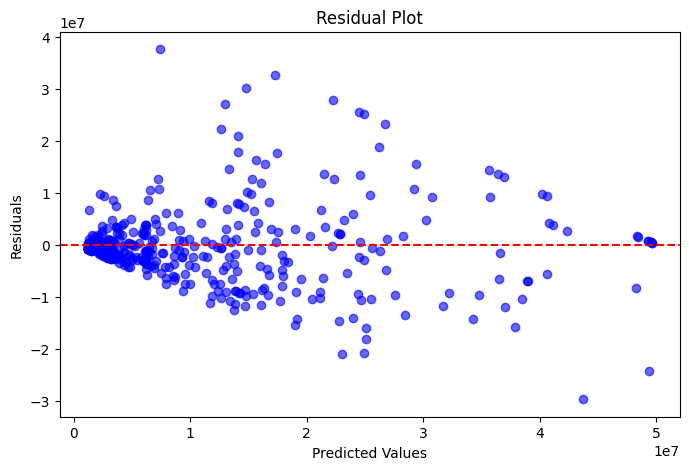

Bagging Ensemble -> RMSE: 8724050.57, R²: 0.5733
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8603, Test: 0.5733
🔹 MSE - Train: 25348551178723.1172, Test: 76109058338311.4531
🔹 RMSE - Train: 5034734.4695, Test: 8724050.5694
🔹 MAE - Train: 3495543.2198, Test: 6071886.9928
🔹 Cross-Validation R² (Mean): 0.6174 ± 0.0272


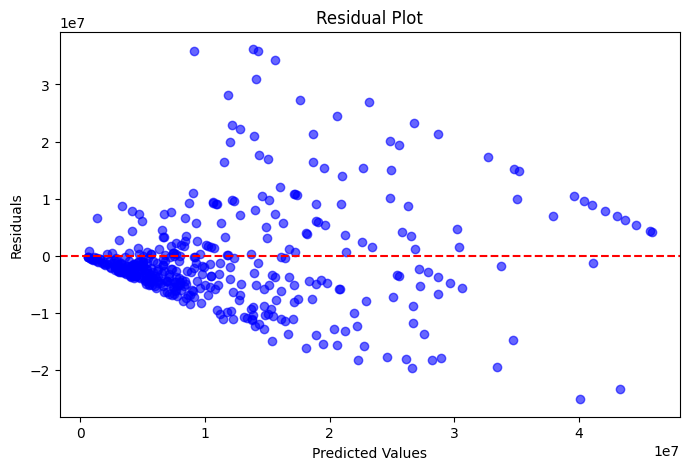

Boosting Ensemble -> RMSE: 7751454.95, R²: 0.6632
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.9652, Test: 0.6632
🔹 MSE - Train: 6315696195037.5342, Test: 60085053878976.8438
🔹 RMSE - Train: 2513104.8914, Test: 7751454.9524
🔹 MAE - Train: 1764572.7333, Test: 5053247.4692
🔹 Cross-Validation R² (Mean): 0.6941 ± 0.0194


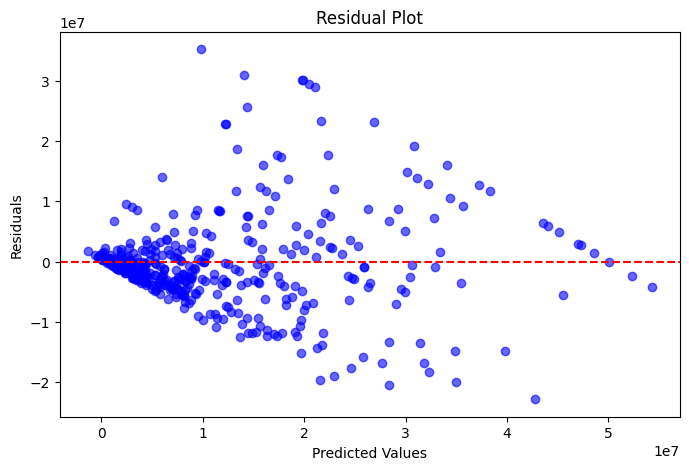

(VotingRegressor(estimators=[('XGBoost',
                              XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True, eta=0.1,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           le...
                                           max_cat_to_onehot=None,
                                           max_delta_step=

In [34]:
processed_df = clean_data_basic(clean_data)
train_and_evaluate_ensemble(processed_df, method="stacking")
train_and_evaluate_ensemble(processed_df, method="bagging")
train_and_evaluate_ensemble(processed_df, method="boosting")

---


## Feature Engineering


In [33]:
def add_pos_metrics(df, pos, drop=False):

    if (pos == 'Defender'):
        # Defensive Actions
        tackles = np.array(df["Tkl"])
        interceptions = np.array(df["Int"])
        blocks = np.array(df["Blocks"])
        clearances = np.array(df["Clr"])
        recoveries = np.array(df["Recov"])
        df["Defensive Actions"] = (
            tackles+interceptions+blocks+clearances+recoveries)/90
        # Aerial Duels
        df["Aerial Duels"] = np.array(df["Won%"])/90
        # Passing and Build-up Play
        key_passes = np.array(df["KP"])
        pass_cmp = np.array(df["Cmp%"])
        df["Passing and Build-up"] = (key_passes+pass_cmp)/90
        # Positioning and Defensive Awarness
        df["Defensive Awareness"] = (clearances+blocks)/90
        # Defensive Contributions
        yellow_cards = np.array(df["CrdY"])
        second_yellow_card = np.array(df["2CrdY"])
        red_cards = np.array(df["CrdR"])
        fouls = np.array(df["Fls"])
        df["Discipline"] = (yellow_cards+second_yellow_card+red_cards+fouls)/90

        # Defensive Duties
        tackles_Def_3rd = np.array(df["Def 3rd"])
        interceptions = np.array(df["Int"])
        df["Defensive Duties"] = (tackles_Def_3rd+interceptions)/90
        # Offensive Contribution
        prg_carries = np.array(df["PrgC"])
        prg_passes = np.array(df["PrgP"])
        key_passes = np.array(df["KP"])
        xA = np.array(df["xA"])
        df["Offensive Contributions"] = (
            prg_carries+prg_passes+xA+key_passes)/90
        # Final Third Play
        crosses_attempted = np.array(df["Crs"])
        shot_creating_actions = np.array(df["SCA"])
        carries_penalty_area = np.array(df["CPA"])
        df["Final Third Play"] = (
            crosses_attempted+shot_creating_actions+carries_penalty_area)/90
        # Possession Play
        TAtt3rd = np.array(df["Att 3rd_possession"])
        carry_distance = np.array(df["TotDist"])
        df["Possession Play"] = (TAtt3rd+carry_distance)/90
        # Dribbling and Transition Play
        successful_take_ons = np.array(df["Succ"])
        df["Dribbling"] = successful_take_ons/90
        if drop:
            df = df.drop(["Tkl", "Int", "Blocks", 'Clr', 'Recov', 'Won%', 'KP', 'Cmp%', 'CrdY', '2CrdY', 'CrdR', 'Fls', 'Def 3rd',
                         'Int', 'PrgC', 'PrgP', 'KP', 'xA', 'Crs', 'SCA', 'CPA', 'Att 3rd_possession', 'TotDist', 'Succ', 'Dribbling'], axis=1)

    elif (pos == 'Midfielder'):
        # Defensive Contributions
        tackles = np.array(df["Tkl"])
        interceptions = np.array(df["Int"])
        blocks = np.array(df["Blocks"])
        clearances = np.array(df["Clr"])
        recoveries = np.array(df["Recov"])
        df["Defensive Contributions"] = (
            tackles+interceptions+blocks+clearances+recoveries)/90
        # Passing Ability
        pass_cmp = np.array(df["Cmp%"])
        df["Passing Ability"] = pass_cmp/90
        # Build-up Play
        xA = np.array(df["xA"])
        xAG = np.array(df["xAG"])
        npxG = np.array(df["npxG"])
        df["Build-Up Play"] = (xA+xAG+npxG)/90
        # Ball Recovery and Defensive Work
        recoveries = np.array(df["Recov"])
        interceptions = np.array(df["Int"])
        df["Ball Recovery & Defensive Work"] = (recoveries+interceptions)/90
        # Defensive Line Breaking Passes
        prg_passes = np.array(df["PrgP"])
        key_passes = np.array(df["KP"])
        passes_final_third = np.array(df["1/3"])
        df["Line Breaking Passes"] = (
            key_passes+prg_passes+passes_final_third)/90

        # Passing and Vision
        prg_passes = np.array(df["PrgP"])
        passes_final_third = np.array(df["1/3"])
        df["Passing"] = (prg_passes+passes_final_third)/90
        # Ball Carrying
        successful_take_ons = np.array(df["Succ"])
        prg_carries = np.array(df["PrgC"])
        cpa = np.array(df["CPA"])
        df["Ball Carrying"] = (successful_take_ons+prg_carries+cpa)/90
        # Defensive Work
        tackles = np.array(df["Tkl"])
        interceptions = np.array(df["Int"])
        blocks = np.array(df["Blocks"])
        clearances = np.array(df["Clr"])
        recoveries = np.array(df["Recov"])
        df["Defensive Work"] = (tackles+interceptions +
                                blocks+clearances+recoveries)/90
        # Chance Creation
        sca = np.array(df["SCA"])
        xG = np.array(df["xG"])
        xA = np.array(df["xA"])
        xAG = np.array(df["xAG"])
        df["Chance Creation"] = (sca+xG+xA+xAG)/90
        # Possession Retention
        pass_cmp = np.array(df["Cmp"])
        key_passes = np.array(df["KP"])
        passes_final_third = np.array(df["1/3"])
        successful_take_ons = np.array(df["Succ"])
        df["Possession Retention"] = (
            pass_cmp+key_passes+passes_final_third+successful_take_ons)/90

        # Creativity and Playmaking
        xA = np.array(df["xA"])
        sca = np.array(df["SCA"])
        passes_final_third = np.array(df["1/3"])
        df["Playmaking"] = (xA+sca+passes_final_third)/90
        # Ball Progression
        prg_carries = np.array(df["PrgC"])
        prg_passes = np.array(df["PrgP"])
        df["Ball Progression"] = (prg_passes+prg_carries)/90
        # Final Third Impact
        TAtt3rd = np.array(df["Att 3rd_possession"])
        cpa = np.array(df["CPA"])
        ppa = np.array(df["PPA"])
        df["Final Third Impact"] = (TAtt3rd+cpa+ppa)/90
        # Goal Threat
        xG = np.array(df["xG"])
        npxG = np.array(df["npxG"])
        goal = np.array(df["Gls"])
        df["Goal Threat"] = (xG+npxG+goal)/90
        # Final Ball Efficiency
        passes_final_third = np.array(df["1/3_possession"])
        ppa = np.array(df['PPA'])
        df["Final Ball Efficiency"] = (passes_final_third+ppa)/90

    elif (pos == "Forward"):
        # Dribbling and Ball Carrying
        successful_take_ons = np.array(df["Succ"])
        prg_carries = np.array(df["PrgC"])
        cpa = np.array(df["CPA"])
        df["Dribbling"] = (successful_take_ons+prg_carries+cpa)/90
        # Crossing and Playmaking
        xA = np.array(df["xA"])
        xAG = np.array(df["xAG"])
        crosses_attempted = np.array(df["Crs"])
        df["Crosses and Playmaking"] = (xA+xAG+crosses_attempted)/90
        # Goal Threat
        xG = np.array(df["xG"])
        npxG = np.array(df["npxG"])
        goal = np.array(df["Gls"])
        df["Goal Threat"] = (xG+npxG+goal)/90
        # Final Third Involvement
        TAtt3rd = np.array(df["Att 3rd_possession"])
        cpa = np.array(df["CPA"])
        ppa = np.array(df["PPA"])
        df["Final Third Impact"] = (TAtt3rd+cpa+ppa)/90
        # Ball Carrying
        successful_take_ons = np.array(df["Succ"])
        prg_carries = np.array(df["PrgC"])
        cpa = np.array(df["CPA"])
        df["Ball Carrying"] = (successful_take_ons+prg_carries+cpa)/90

        # Goal Threat
        xG = np.array(df["xG"])
        npxG = np.array(df["npxG"])
        goal = np.array(df["Gls"])
        df["Goal Threat"] = (xG+npxG+goal)/90
        # Chance Conversion
        npGoals = np.array(df["G-PK"])/90
        xG = np.array(df["xG"])/90
        df["Chance Conversion"] = npGoals/xG
        # Link-up Play
        prg_received = np.array(df["PrgR"])
        passes_final_third = np.array(df["1/3_possession"])
        xA = np.array(df["xA"])
        ppa = np.array(df["PPA"])
        df["Link-Up Play"] = (prg_received+xA+ppa)/90
        # Shooting Accuracy
        SoT = np.array(df["SoT/90"])
        shots = np.array(df["Sh/90"])
        df["Shooting Accuracy"] = SoT+shots
        # Penalty Box Presence
        TAttPen = np.array(df["Att Pen"])
        df["Penalty Box Presence"] = TAttPen/90

    elif (pos == "Goalkeeper"):
        # Shot Stopping Ability
        saves = np.array(df["Saves"])
        df["Shot Stopping"] = saves/90
        # Expected Goals Prevented
        psxG = np.array(df["PSxG"]/90)
        ga = np.array(df["GA"]/90)
        df["Expected Goals Prevented"] = psxG-ga
        # Cross and Aerial Control
        crosses_stopped = np.array(df["Stp"])
        df["Cross and Aerial Control"] = crosses_stopped/90
        # Sweeper Keeper Activity
        sweeper = np.array(df["#OPA/90"])
        df["Sweeper Keeper Activity"] = sweeper
        # Passing and Distribution
        passes_cmp = np.array(df["Cmp"])
        df["Passing"] = passes_cmp/90

    return df

In [34]:
list(clean_data.columns)

['Nation',
 'Squad',
 'Comp',
 'MP',
 'Starts',
 'Min',
 '90s',
 'PKatt',
 'Mn/MP',
 'Min%',
 'Mn/Start',
 'Compl',
 'Subs',
 'Mn/Sub',
 'unSub',
 'PPM',
 'onG',
 'onGA',
 '_/_',
 '_/_90',
 'On_Off',
 'onxG',
 'onxGA',
 'xG_/_',
 'xG_/_90',
 'On_Off_1',
 'CrdY',
 'CrdR',
 '2CrdY',
 'Fls',
 'Fld',
 'Off',
 'Crs',
 'Int',
 'TklW',
 'PKwon',
 'PKcon',
 'OG',
 'Recov',
 'Won',
 'Lost',
 'Won%',
 'Tkl',
 'TklW_defense',
 'Def 3rd',
 'Mid 3rd',
 'Att 3rd',
 'Tkl_1',
 'Att',
 'Tkl%',
 'Lost_defense',
 'Blocks',
 'Sh',
 'Pass',
 'Int_defense',
 'Tkl_Int',
 'Clr',
 'Err',
 'Cmp',
 'Att_passing',
 'Cmp%',
 'TotDist',
 'PrgDist',
 'Cmp_1',
 'Att_1',
 'Cmp%_1',
 'Cmp_2',
 'Att_2',
 'Cmp%_2',
 'Cmp_3',
 'Att_3',
 'Cmp%_3',
 'Ast',
 'xAG',
 'xA',
 'A_xAG',
 'KP',
 '1/3',
 'PPA',
 'CrsPA',
 'PrgP',
 'Gls',
 'G_A',
 'G_PK',
 'PK',
 'xG',
 'npxG',
 'npxG_xAG',
 'PrgC',
 'PrgR',
 'Gls_1',
 'Ast_1',
 'G_A_1',
 'G_PK_1',
 'G_A_PK',
 'xG_1',
 'xAG_1',
 'xG_xAG',
 'npxG_1',
 'npxG_xAG_1',
 'SCA',
 'SCA90',


XGBoost -> RMSE: 7007931.92, R²: 0.6194
📊 Model Evaluation Results:
🔹 R² Score - Train: 1.0000, Test: 0.6194
🔹 MSE - Train: 77802.8904, Test: 49111109798986.8438
🔹 RMSE - Train: 278.9317, Test: 7007931.9203
🔹 MAE - Train: 189.0971, Test: 4902843.4212
🔹 Cross-Validation R² (Mean): 0.4817 ± 0.0591


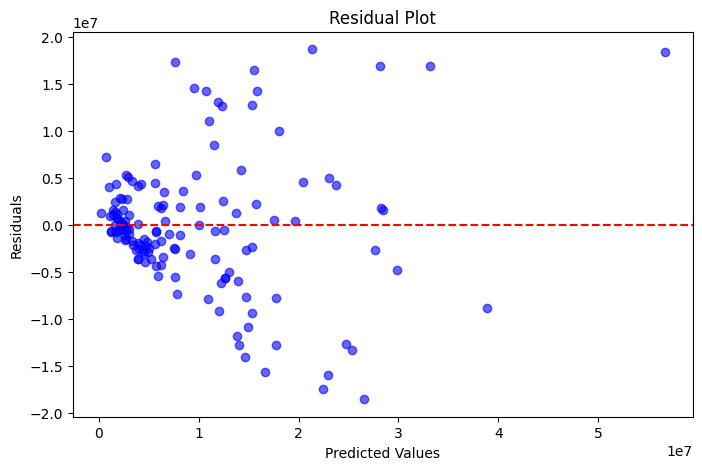

LightGBM -> RMSE: 6693983.28, R²: 0.6528
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.9335, Test: 0.6528
🔹 MSE - Train: 12614881929975.0391, Test: 44809412119610.3672
🔹 RMSE - Train: 3551743.5057, Test: 6693983.2775
🔹 MAE - Train: 1911730.8667, Test: 4689141.9046
🔹 Cross-Validation R² (Mean): 0.5629 ± 0.0288


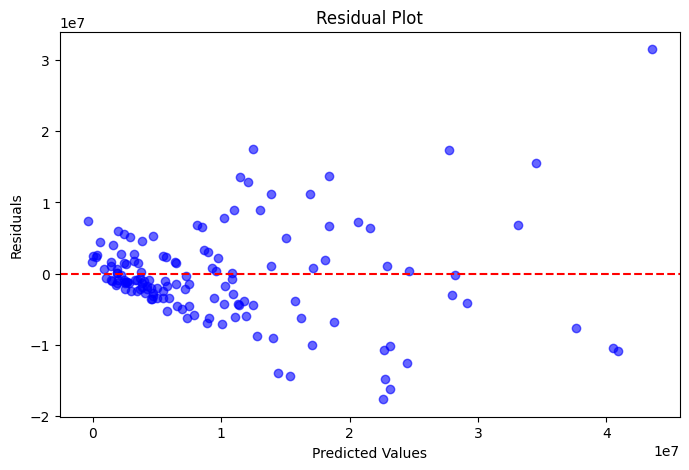

RandomForest -> RMSE: 7415811.70, R²: 0.5738
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8987, Test: 0.5738
🔹 MSE - Train: 19221065674777.1289, Test: 54994263102269.8438
🔹 RMSE - Train: 4384183.5813, Test: 7415811.6954
🔹 MAE - Train: 3104099.5397, Test: 5090650.7094
🔹 Cross-Validation R² (Mean): 0.4672 ± 0.0316


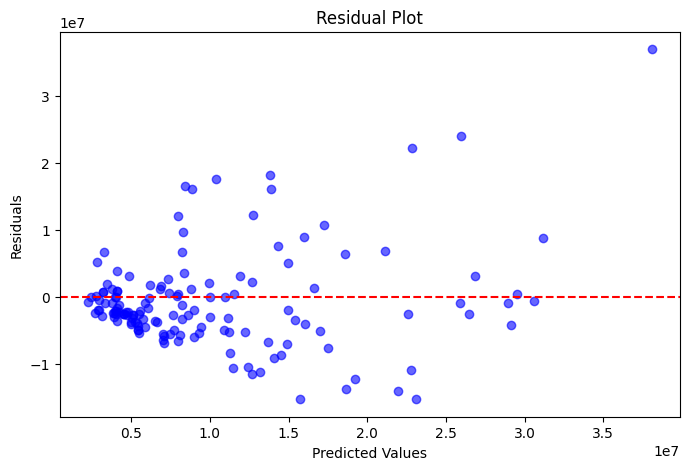


Best model for Defenders: LGBMRegressor (RMSE: 6693983.28, R²: 0.6528)

XGBoost -> RMSE: 15719126.41, R²: 0.2467
📊 Model Evaluation Results:
🔹 R² Score - Train: 1.0000, Test: 0.2467
🔹 MSE - Train: 3005.5832, Test: 247090935173888.8438
🔹 RMSE - Train: 54.8232, Test: 15719126.4126
🔹 MAE - Train: 37.3515, Test: 8234030.2099
🔹 Cross-Validation R² (Mean): 0.5568 ± 0.0728


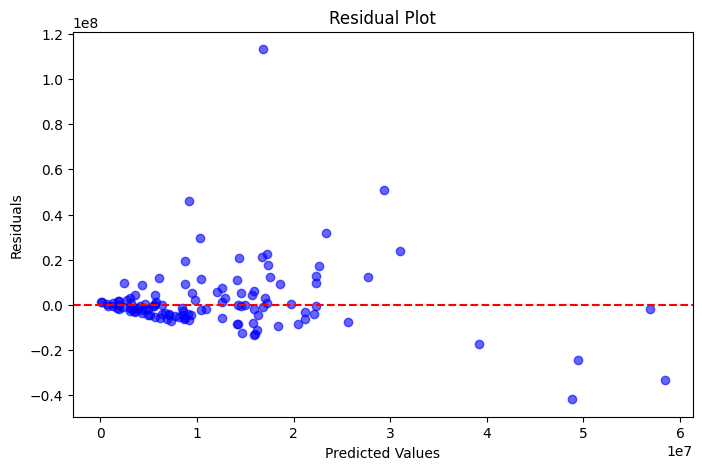

LightGBM -> RMSE: 16121505.16, R²: 0.2076
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8980, Test: 0.2076
🔹 MSE - Train: 49816778127288.6406, Test: 259902928561827.2812
🔹 RMSE - Train: 7058100.1783, Test: 16121505.1581
🔹 MAE - Train: 3222217.2695, Test: 8868226.7631
🔹 Cross-Validation R² (Mean): 0.5637 ± 0.0484


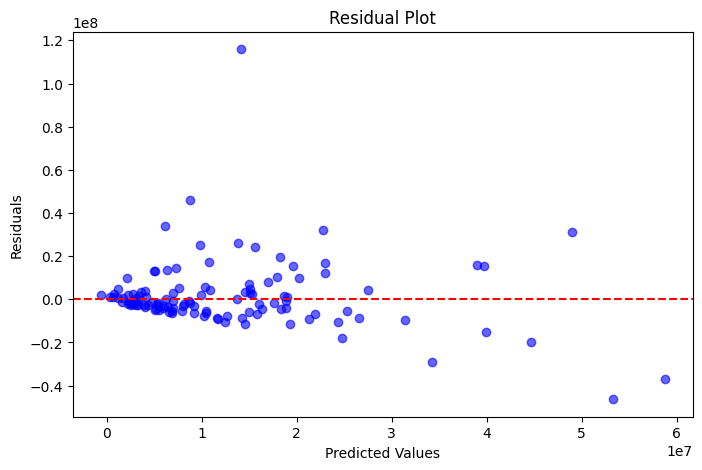

RandomForest -> RMSE: 16520621.50, R²: 0.1679
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.9060, Test: 0.1679
🔹 MSE - Train: 45923825841109.6328, Test: 272930934810792.4375
🔹 RMSE - Train: 6776712.0229, Test: 16520621.5020
🔹 MAE - Train: 4516876.5976, Test: 9213640.2900
🔹 Cross-Validation R² (Mean): 0.5195 ± 0.0748


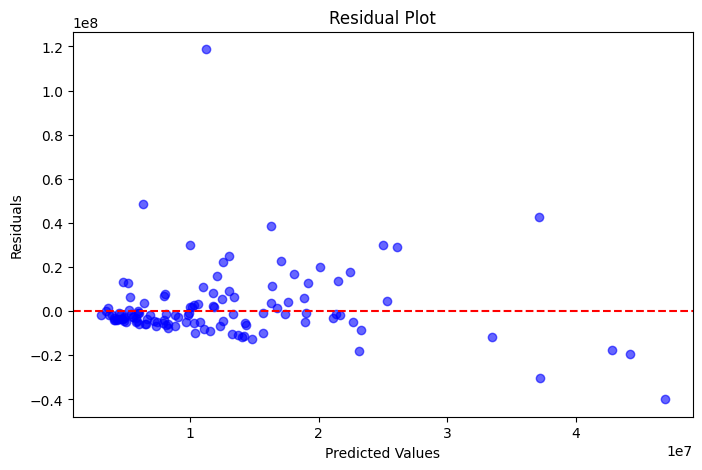


Best model for Midfielders: XGBRegressor (RMSE: 15719126.41, R²: 0.2467)

XGBoost -> RMSE: 23915762.83, R²: 0.2123
📊 Model Evaluation Results:
🔹 R² Score - Train: 1.0000, Test: 0.2123
🔹 MSE - Train: 564.1664, Test: 571963711977915.5000
🔹 RMSE - Train: 23.7522, Test: 23915762.8350
🔹 MAE - Train: 16.5686, Test: 11992979.4590
🔹 Cross-Validation R² (Mean): 0.3138 ± 0.2019


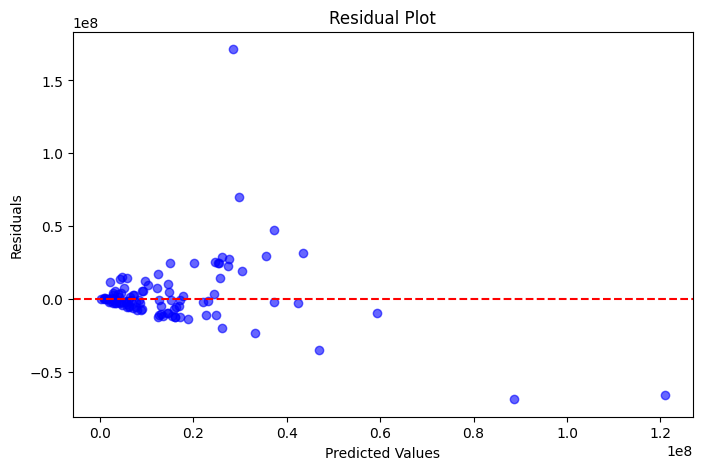

LightGBM -> RMSE: 21535459.61, R²: 0.3613
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8735, Test: 0.3613
🔹 MSE - Train: 61675499986534.1406, Test: 463776020474197.1250
🔹 RMSE - Train: 7853375.0698, Test: 21535459.6068
🔹 MAE - Train: 3302914.6937, Test: 11054381.0650
🔹 Cross-Validation R² (Mean): 0.5016 ± 0.1022


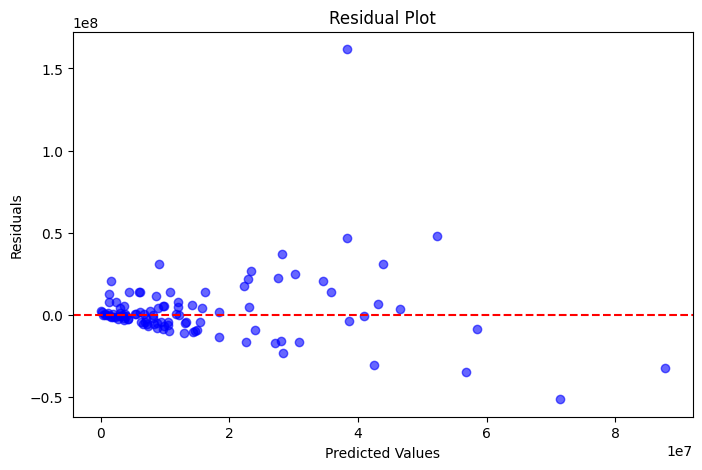

RandomForest -> RMSE: 21311798.41, R²: 0.3745
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8557, Test: 0.3745
🔹 MSE - Train: 70352854092897.1875, Test: 454192751634875.0625
🔹 RMSE - Train: 8387660.8237, Test: 21311798.4139
🔹 MAE - Train: 4462674.6283, Test: 11672427.4919
🔹 Cross-Validation R² (Mean): 0.4289 ± 0.0921


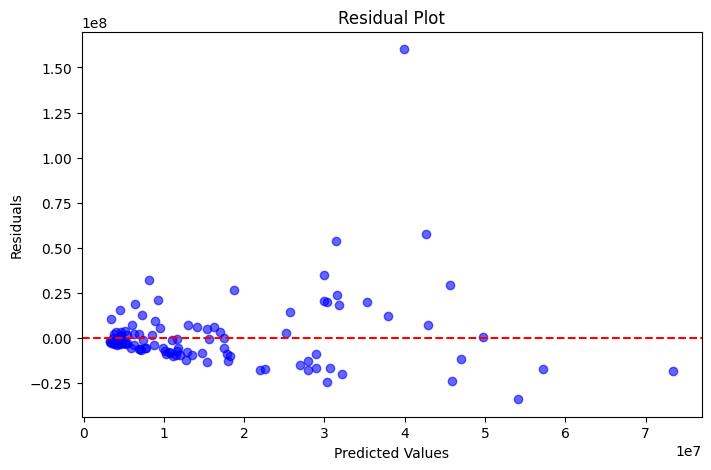


Best model for Forwards: RandomForestRegressor (RMSE: 21311798.41, R²: 0.3745)

XGBoost -> RMSE: 5255551.83, R²: 0.5345
📊 Model Evaluation Results:
🔹 R² Score - Train: 1.0000, Test: 0.5345
🔹 MSE - Train: 53.8213, Test: 27620825018155.4219
🔹 RMSE - Train: 7.3363, Test: 5255551.8281
🔹 MAE - Train: 4.1304, Test: 2805243.1747
🔹 Cross-Validation R² (Mean): -0.0692 ± 0.8331


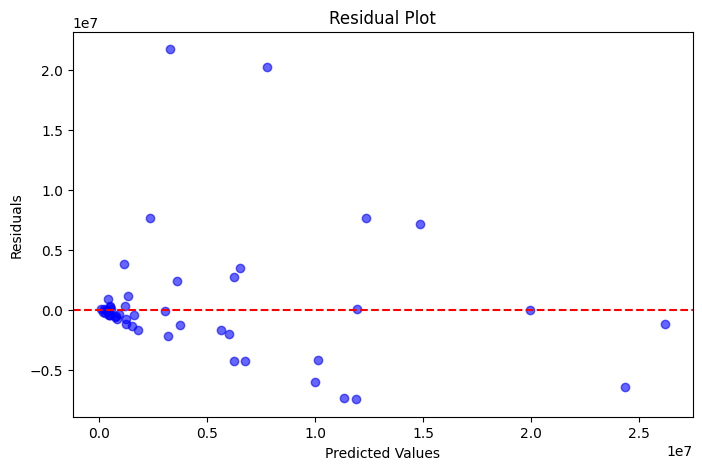

LightGBM -> RMSE: 5193564.68, R²: 0.5454
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8790, Test: 0.5454
🔹 MSE - Train: 9031157109001.0820, Test: 26973114103420.9453
🔹 RMSE - Train: 3005188.3650, Test: 5193564.6817
🔹 MAE - Train: 1751856.6615, Test: 3001729.8808
🔹 Cross-Validation R² (Mean): 0.2916 ± 0.2867


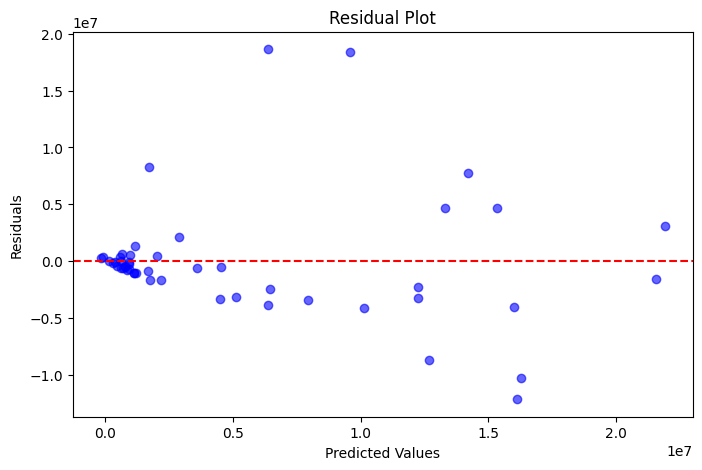

RandomForest -> RMSE: 4819484.68, R²: 0.6085
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8359, Test: 0.6085
🔹 MSE - Train: 12250363887470.7461, Test: 23227432573373.2344
🔹 RMSE - Train: 3500051.9835, Test: 4819484.6792
🔹 MAE - Train: 2289910.1188, Test: 2901711.5857
🔹 Cross-Validation R² (Mean): 0.3799 ± 0.1943


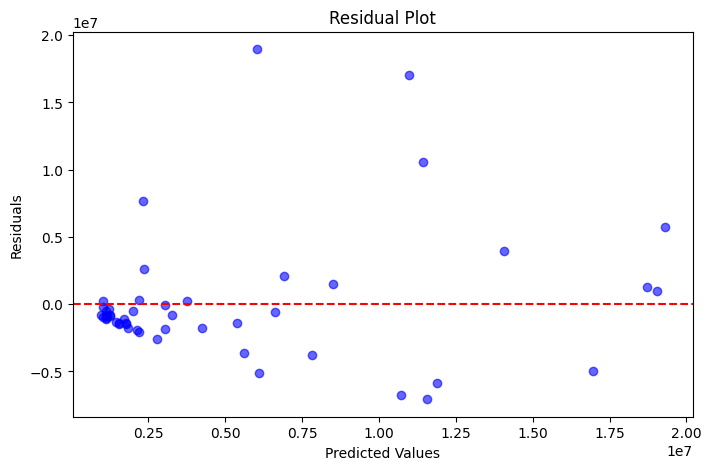


Best model for Goalkeepers: RandomForestRegressor (RMSE: 4819484.68, R²: 0.6085)



{'Defenders': LGBMRegressor(learning_rate=0.05, objective='regression', verbose=-1),
 'Midfielders': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...),
 'Forwards': RandomForestRegressor(max_depth=10, random_state=42),
 'Goalkeepers': RandomForestRegressor(max_depth=10, random_state=42)}

In [19]:
def feature_engineered_indi_model(df):

    models = {}

    dfs, mf, gk, fw = split_by_position(df=df)

    for df, pos in zip([dfs, mf, fw, gk], ["Defender", "Midfielder", "Forward", "Goalkeeper"]):
        df = add_pos_metrics(df, pos)
        df = clean_data_basic(df)
        # print(sum(df.isna().sum()))

    for position, df_position in zip([
            "Defenders", "Midfielders", "Forwards", "Goalkeepers"],
            [dfs, mf, fw, gk]):

        if df_position.empty:
            continue

        # df_position = clean_data_basic(df_position)
        best_model, best_rmse, best_r2 = None, float("inf"), -float("inf")

        for model_name in [
            # "LinearRegression",
            # "RidgeRegression",
            # "LassoRegression",
            # "ElasticNet",
            "XGBoost",
            "LightGBM",
            "RandomForest",
            # "GradientBoosting",
            # "AdaBoost",
            # "SVR",
            # "MLPRegressor"
        ]:
            model, rmse, r2 = train_and_evaluate(df_position, model_name)
            if rmse < best_rmse:
                best_model, best_rmse, best_r2 = model, rmse, r2

        models[position] = best_model
        print(
            f"\nBest model for {position}: {type(best_model).__name__} (RMSE: {best_rmse:.2f}, R²: {best_r2:.4f})\n")

    return models


feature_engineered_indi_model(final_df)

In [38]:
for pos, df in zip(["Defender", "Midfielder", "Forward", "Goalkeeper"], [df, mf, fw, gk]):
    df = add_pos_metrics(df, pos)
    # df = clean_data_basic(df)
    stacking = train_and_evaluate_ensemble(df, method="stacking")
    bagging = train_and_evaluate_ensemble(df, method="bagging")
    boosting = train_and_evaluate_ensemble(df, method="boosting")

    print(
        f"Position: {pos}:\n\tStacking: {stacking}\n\tBagging: {bagging}\n\tBoosting: {boosting}")

ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

---


## PCA Inclusion


In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def find_optimal_components(df, variance_threshold=0.95):
    # df = clean_data_basic(df)
    # Select numeric data
    #
    numeric_df = df.select_dtypes(include=['number'])

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)

    # Perform PCA
    pca = PCA()
    pca.fit(scaled_data)

    # Compute cumulative explained variance
    explained_variance = np.cumsum(pca.explained_variance_ratio_)

    # Find the number of components that explain the desired variance
    optimal_components = np.argmax(
        explained_variance >= variance_threshold) + 1

    # Plot explained variance
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(explained_variance) + 1),
             explained_variance, marker='o', linestyle='--', color='b')
    plt.axhline(y=variance_threshold, color='r', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance vs. Number of Components')
    plt.grid()
    plt.show()

    return optimal_components

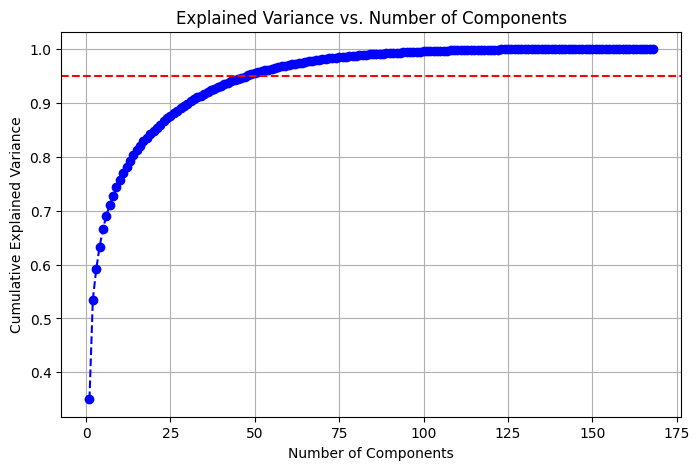

Optimal number of components: 48


In [36]:
optimal_n = find_optimal_components(clean_data, variance_threshold=0.95)
print(f"Optimal number of components: {optimal_n}")

In [37]:
eigenvalues = PCA().fit(StandardScaler().fit_transform(
    clean_data.select_dtypes(include=['number']))).explained_variance_
optimal_n_kaiser = sum(eigenvalues > 1)
print(f"Optimal components based on Kaiser's Rule: {optimal_n_kaiser}")

Optimal components based on Kaiser's Rule: 18


In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def perform_pca(df, n_components=2):
    """
    Performs PCA on the given DataFrame and returns the transformed DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame with numerical values.
        n_components (int): The number of principal components to keep.

    Returns:
        pd.DataFrame: Transformed DataFrame with principal components.
        PCA: The trained PCA model.
    """
    # Drop non-numeric columns
    numeric_df = df.select_dtypes(include=['number'])

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)

    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_transformed = pca.fit_transform(scaled_data)

    # Create a DataFrame with principal components
    pca_df = pd.DataFrame(pca_transformed, columns=[
                          f'PC{i+1}' for i in range(n_components)])
    marketValue = df["marketValue"]
    # Retain non-numeric columns for reference
    non_numeric_df = df.select_dtypes(
        exclude=['number']).reset_index(drop=True)
    result_df = pd.concat([non_numeric_df, pca_df], axis=1)
    result_df["marketValue"] = marketValue
    return result_df, pca


reduced_df, pca_model = perform_pca(clean_data, n_components=35)
reduced_df.head()

,Nation,Squad,Comp,position,dateOfBirth,nationality,foot,joinedOn,contract,PC1,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,marketValue
0,ENG,West Ham,eng Premier League,Left-Back,1989-12-15,['England'],left,2014-07-03,2025-06-30,-4.688894,...,-0.432196,-0.810076,0.032191,-0.190184,0.340923,-0.844998,-1.689527,-0.118524,-1.235842,700000.0
1,ENG,Southampton,eng Premier League,Goalkeeper,1998-05-14,['England'],right,2024-08-30,2028-06-30,-3.058765,...,-0.694484,0.966475,-0.579467,0.100849,0.708287,-0.005733,-0.052725,-0.167025,0.273589,20000000.0
2,ESP,Genoa,it Serie A,Left-Back,1997-04-22,['Spain'],left,2023-07-03,2026-06-30,13.635357,...,-0.478989,-0.497881,0.653829,-1.492167,-1.433692,-0.344059,0.611046,-0.190687,-0.196991,5000000.0
3,CIV,Strasbourg,fr Ligue 1,Centre-Back,2002-12-25,"[""Cote d'Ivoire""]",left,2023-07-15,2028-06-30,-2.740970,...,-0.425040,-0.709286,-1.163052,-0.421056,-0.331653,-0.676592,0.414741,0.426552,0.169295,12000000.0
4,SEN,Brest,fr Ligue 1,Right Winger,2001-06-17,['Senegal'],right,2024-08-21,2025-06-30,0.018306,...,-0.051566,0.008865,-0.401720,-0.063973,-0.510632,-0.005185,1.146767,-0.414847,0.031604,10000000.0


---


## PCA with individual models


In [39]:
def pca_on_individual_model(df):
    models = {}

    df, mf, gk, fw = split_by_position(df=df)

    # for df, pos in zip([df, mf, fw, gk], ["Defender", "Midfielder", "Forward", "Goalkeeper"]):
    # df = add_pos_metrics(df, pos)

    for position, df_position in zip([
            "Defenders", "Midfielders", "Forwards", "Goalkeepers"],
            [df, mf, fw, gk]):

        if df_position.empty:
            continue

        df_position = clean_data_basic(df_position)
        best_model, best_rmse, best_r2 = None, float("inf"), -float("inf")

        for model_name in [
            "LinearRegression", "RidgeRegression", "LassoRegression",
            "ElasticNet",
            "XGBoost", "LightGBM", "RandomForest", "GradientBoosting",
                "AdaBoost"]:
            model, rmse, r2 = train_and_evaluate(df_position, model_name)
            if rmse < best_rmse:
                best_model, best_rmse, best_r2 = model, rmse, r2

        models[position] = best_model
        print(
            f"\nBest model for {position}: {type(best_model).__name__} (RMSE: {best_rmse:.2f}, R²: {best_r2:.4f})\n")

    return models

LinearRegression -> RMSE: 4371191.54, R²: 0.8435
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8652, Test: 0.8435
🔹 MSE - Train: 16737759728696.0527, Test: 19107315450505.8633
🔹 RMSE - Train: 4091180.7255, Test: 4371191.5367
🔹 MAE - Train: 3106841.3269, Test: 3465979.4273
🔹 Cross-Validation R² (Mean): 0.8159 ± 0.0238


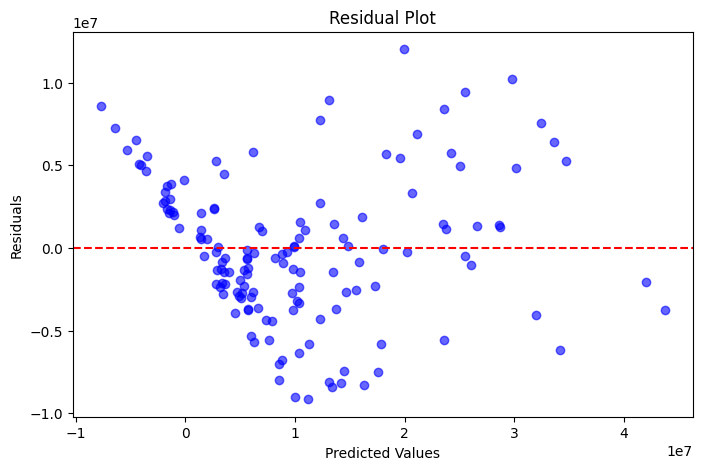

RidgeRegression -> RMSE: 4412276.35, R²: 0.8406
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8640, Test: 0.8406
🔹 MSE - Train: 16887830170700.8516, Test: 19468182548585.3828
🔹 RMSE - Train: 4109480.5232, Test: 4412276.3454
🔹 MAE - Train: 3135364.4439, Test: 3497774.4685
🔹 Cross-Validation R² (Mean): 0.8159 ± 0.0237


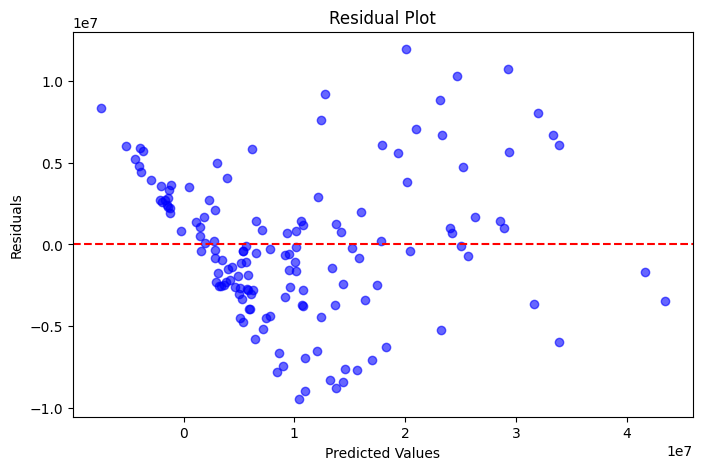

LassoRegression -> RMSE: 4371123.85, R²: 0.8435
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8652, Test: 0.8435
🔹 MSE - Train: 16737824058891.5918, Test: 19106723680179.0820
🔹 RMSE - Train: 4091188.5875, Test: 4371123.8464
🔹 MAE - Train: 3107209.7220, Test: 3465140.7270
🔹 Cross-Validation R² (Mean): 0.8161 ± 0.0236


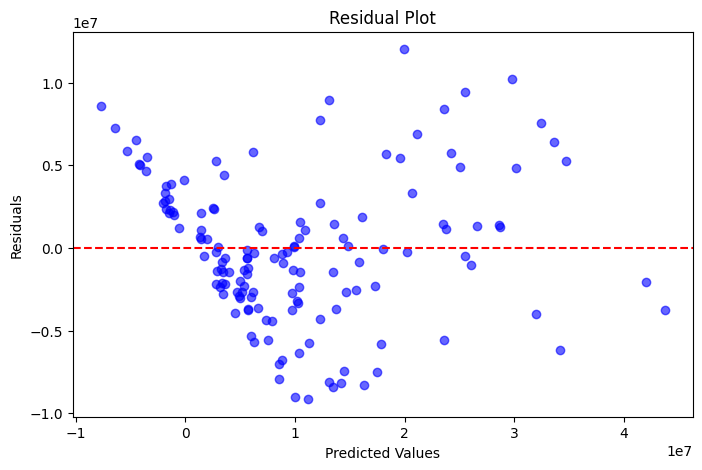

ElasticNet -> RMSE: 5795738.71, R²: 0.7249
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.7255, Test: 0.7249
🔹 MSE - Train: 34079031763724.4023, Test: 33590587166389.6641
🔹 RMSE - Train: 5837724.8791, Test: 5795738.7076
🔹 MAE - Train: 4439748.1322, Test: 4185006.0731
🔹 Cross-Validation R² (Mean): 0.6834 ± 0.0257


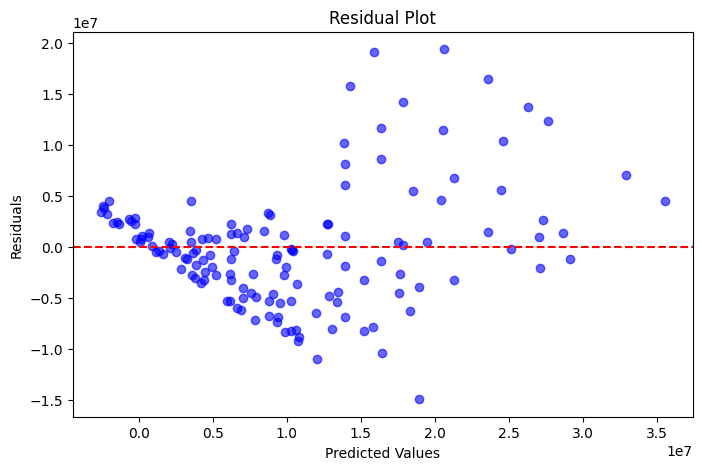

XGBoost -> RMSE: 6835386.33, R²: 0.6174
📊 Model Evaluation Results:
🔹 R² Score - Train: 1.0000, Test: 0.6174
🔹 MSE - Train: 7325.1737, Test: 46722506287790.4922
🔹 RMSE - Train: 85.5872, Test: 6835386.3305
🔹 MAE - Train: 57.5118, Test: 4747613.0385
🔹 Cross-Validation R² (Mean): 0.5781 ± 0.0888


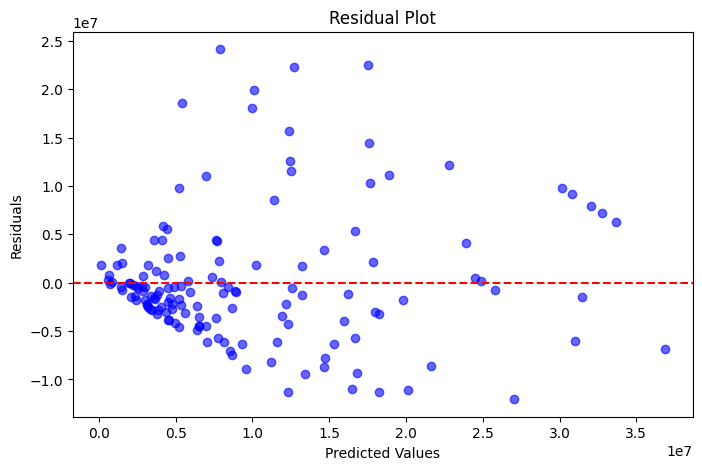

LightGBM -> RMSE: 6352323.47, R²: 0.6696
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.9662, Test: 0.6696
🔹 MSE - Train: 4196273831720.3813, Test: 40352013524592.6562
🔹 RMSE - Train: 2048480.8595, Test: 6352323.4745
🔹 MAE - Train: 1372043.0450, Test: 4409185.7699
🔹 Cross-Validation R² (Mean): 0.6263 ± 0.0620


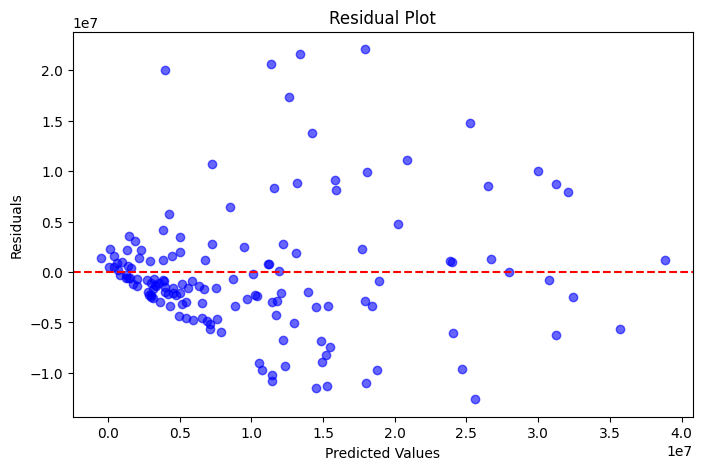

RandomForest -> RMSE: 6826008.02, R²: 0.6184
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.9274, Test: 0.6184
🔹 MSE - Train: 9011948977805.2715, Test: 46594385478193.4297
🔹 RMSE - Train: 3001990.8357, Test: 6826008.0192
🔹 MAE - Train: 2371493.9064, Test: 5120419.6407
🔹 Cross-Validation R² (Mean): 0.5440 ± 0.1081


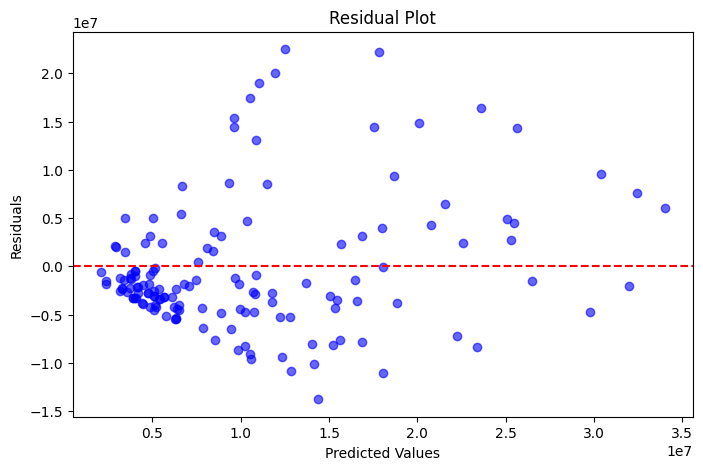

GradientBoosting -> RMSE: 6452548.59, R²: 0.6590
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.9657, Test: 0.6590
🔹 MSE - Train: 4252658445714.2915, Test: 41635383242386.7656
🔹 RMSE - Train: 2062197.4798, Test: 6452548.5850
🔹 MAE - Train: 1586856.6101, Test: 4741182.0591
🔹 Cross-Validation R² (Mean): 0.6361 ± 0.0701


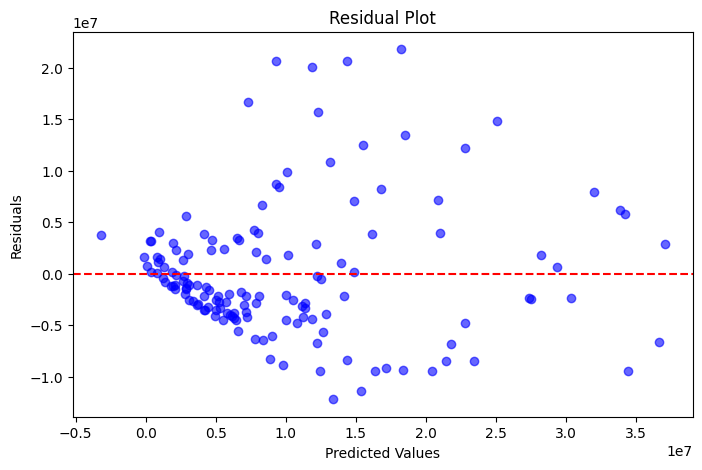

AdaBoost -> RMSE: 7332223.80, R²: 0.5597
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.7741, Test: 0.5597
🔹 MSE - Train: 28047778826561.0039, Test: 53761505806501.8047
🔹 RMSE - Train: 5296015.3726, Test: 7332223.7968
🔹 MAE - Train: 4815612.4806, Test: 6141788.4449
🔹 Cross-Validation R² (Mean): 0.5476 ± 0.0653


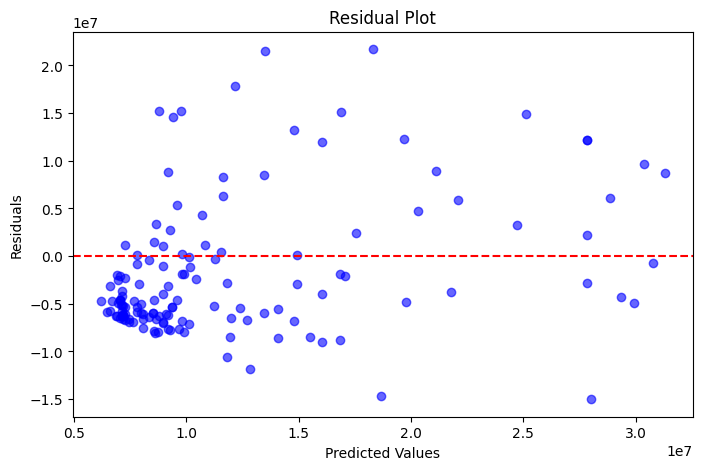


Best model for Defenders: Lasso (RMSE: 4371123.85, R²: 0.8435)

LinearRegression -> RMSE: 5456108.81, R²: 0.8479
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8904, Test: 0.8479
🔹 MSE - Train: 21983482994926.0000, Test: 29769123398957.3672
🔹 RMSE - Train: 4688654.7106, Test: 5456108.8148
🔹 MAE - Train: 3555719.1712, Test: 4186225.7509
🔹 Cross-Validation R² (Mean): 0.8576 ± 0.0307


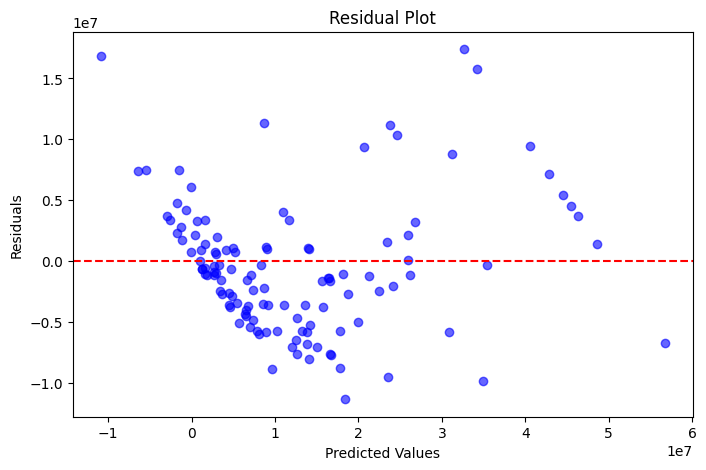

RidgeRegression -> RMSE: 5740614.77, R²: 0.8317
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8877, Test: 0.8317
🔹 MSE - Train: 22533245594578.4023, Test: 32954657880343.4766
🔹 RMSE - Train: 4746919.5901, Test: 5740614.7650
🔹 MAE - Train: 3690931.4772, Test: 4427993.9532
🔹 Cross-Validation R² (Mean): 0.8542 ± 0.0267


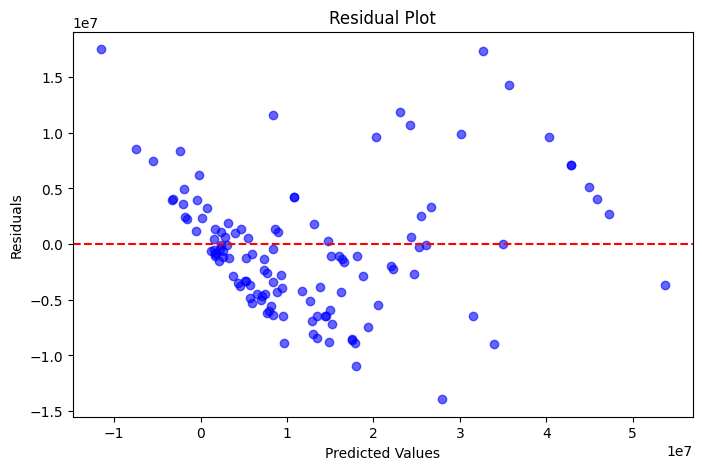

LassoRegression -> RMSE: 5625154.98, R²: 0.8384
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8892, Test: 0.8384
🔹 MSE - Train: 22232557393025.8633, Test: 31642368578479.5586
🔹 RMSE - Train: 4715141.2909, Test: 5625154.9826
🔹 MAE - Train: 3620492.0283, Test: 4328224.0934
🔹 Cross-Validation R² (Mean): 0.8564 ± 0.0280


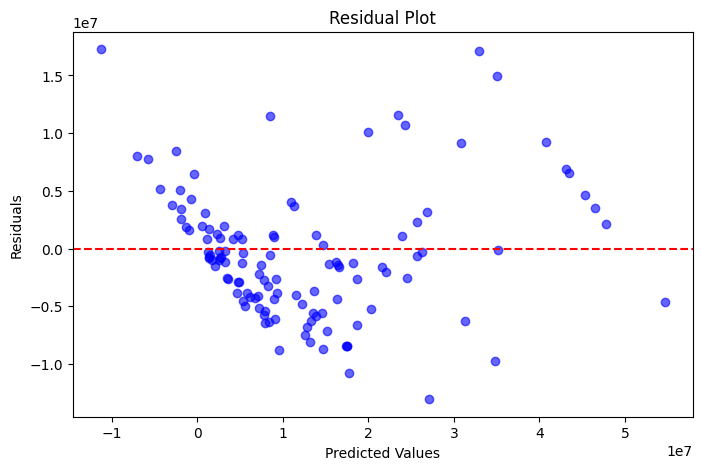

ElasticNet -> RMSE: 7721443.91, R²: 0.6954
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.7639, Test: 0.6954
🔹 MSE - Train: 47367877962825.4766, Test: 59620696084774.8984
🔹 RMSE - Train: 6882432.5614, Test: 7721443.9119
🔹 MAE - Train: 5322873.6674, Test: 6128567.0094
🔹 Cross-Validation R² (Mean): 0.7249 ± 0.0400


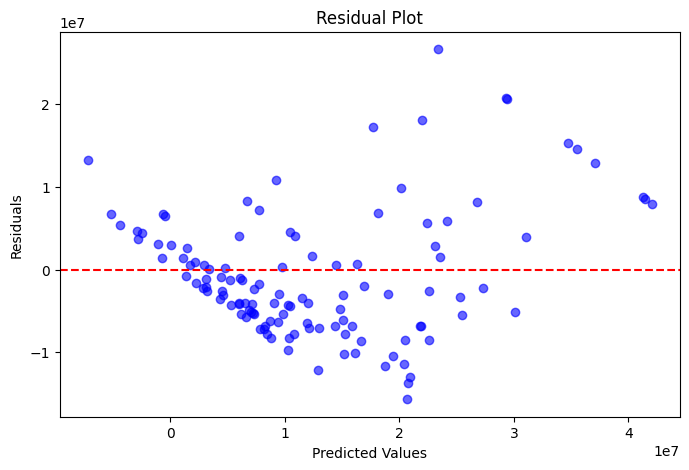

XGBoost -> RMSE: 10600013.01, R²: 0.4260
📊 Model Evaluation Results:
🔹 R² Score - Train: 1.0000, Test: 0.4260
🔹 MSE - Train: 2571.4545, Test: 112360275847878.7656
🔹 RMSE - Train: 50.7095, Test: 10600013.0117
🔹 MAE - Train: 34.2484, Test: 7660254.0010
🔹 Cross-Validation R² (Mean): 0.5902 ± 0.0479


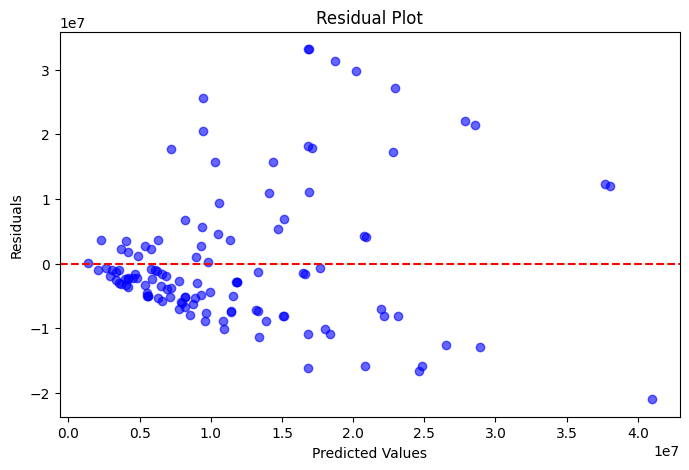

LightGBM -> RMSE: 9421037.83, R²: 0.5466
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.9670, Test: 0.5466
🔹 MSE - Train: 6625830965353.7109, Test: 88755953824669.3125
🔹 RMSE - Train: 2574068.9512, Test: 9421037.8316
🔹 MAE - Train: 1818814.3014, Test: 6899177.7066
🔹 Cross-Validation R² (Mean): 0.6411 ± 0.0527


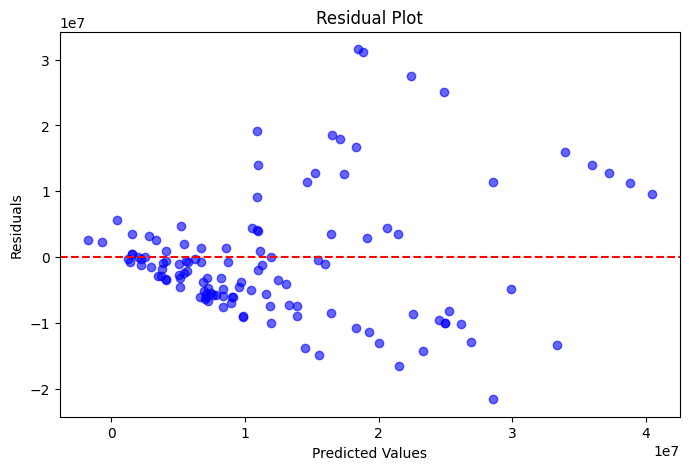

RandomForest -> RMSE: 9897346.20, R²: 0.4996
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.9316, Test: 0.4996
🔹 MSE - Train: 13714875626397.8359, Test: 97957461896568.6094
🔹 RMSE - Train: 3703360.0455, Test: 9897346.2047
🔹 MAE - Train: 2927353.8767, Test: 7600517.5596
🔹 Cross-Validation R² (Mean): 0.5600 ± 0.0404


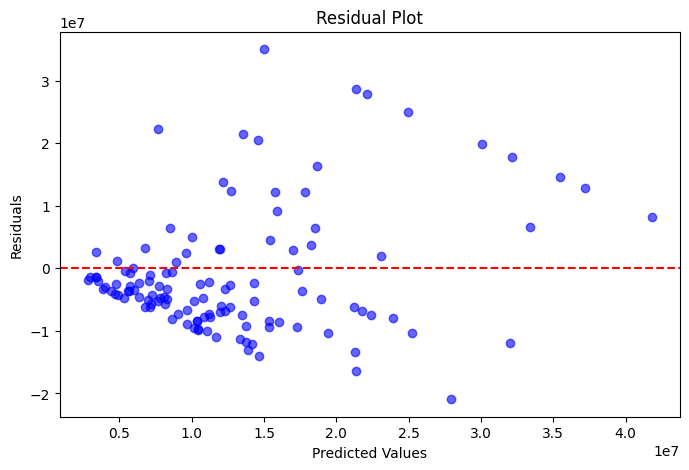

GradientBoosting -> RMSE: 9149124.07, R²: 0.5724
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.9711, Test: 0.5724
🔹 MSE - Train: 5797732991580.5176, Test: 83706471219665.2656
🔹 RMSE - Train: 2407848.2078, Test: 9149124.0684
🔹 MAE - Train: 1888438.5778, Test: 6703153.3288
🔹 Cross-Validation R² (Mean): 0.6618 ± 0.0517


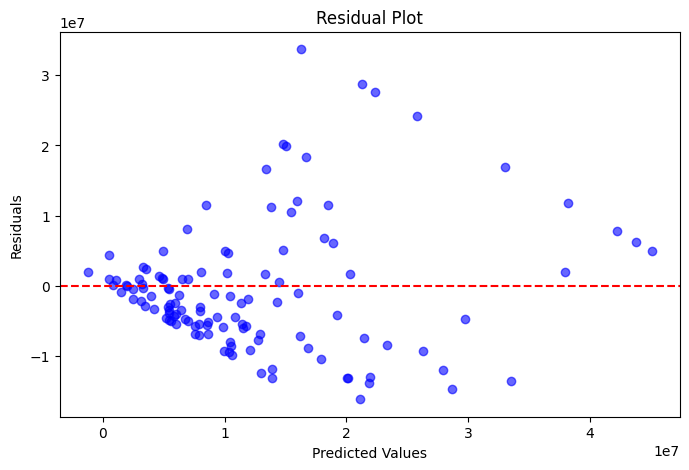

AdaBoost -> RMSE: 9923607.16, R²: 0.4970
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.7780, Test: 0.4970
🔹 MSE - Train: 44522071208077.6016, Test: 98477979080072.8594
🔹 RMSE - Train: 6672486.1340, Test: 9923607.1607
🔹 MAE - Train: 6075490.7860, Test: 8295436.7462
🔹 Cross-Validation R² (Mean): 0.5923 ± 0.0319


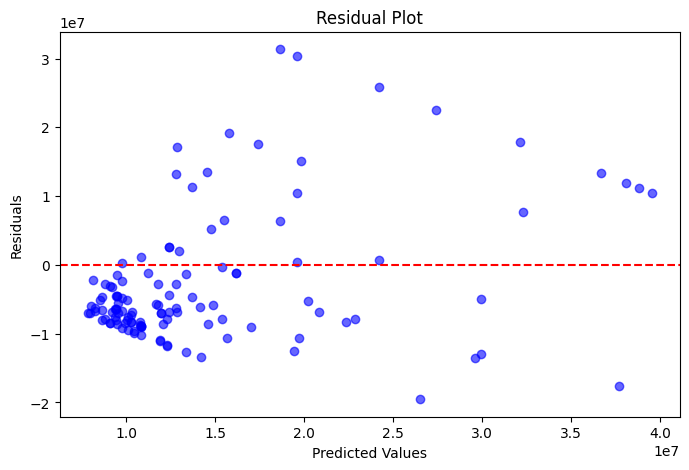


Best model for Midfielders: LinearRegression (RMSE: 5456108.81, R²: 0.8479)

LinearRegression -> RMSE: 4667049.42, R²: 0.8753
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.9101, Test: 0.8753
🔹 MSE - Train: 21561229145179.3945, Test: 21781350287207.2812
🔹 RMSE - Train: 4643407.0622, Test: 4667049.4198
🔹 MAE - Train: 3558160.8554, Test: 3687506.5666
🔹 Cross-Validation R² (Mean): 0.8497 ± 0.0626


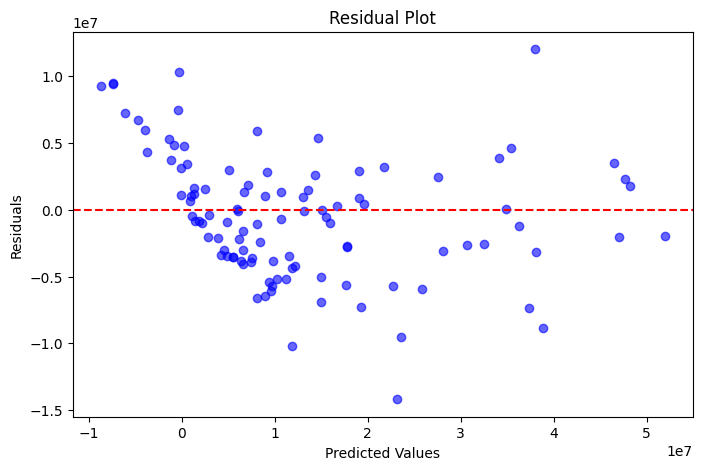

RidgeRegression -> RMSE: 4643806.22, R²: 0.8766
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.9078, Test: 0.8766
🔹 MSE - Train: 22115205582757.4258, Test: 21564936179855.1523
🔹 RMSE - Train: 4702680.6805, Test: 4643806.2169
🔹 MAE - Train: 3635438.2574, Test: 3697248.2085
🔹 Cross-Validation R² (Mean): 0.8704 ± 0.0181


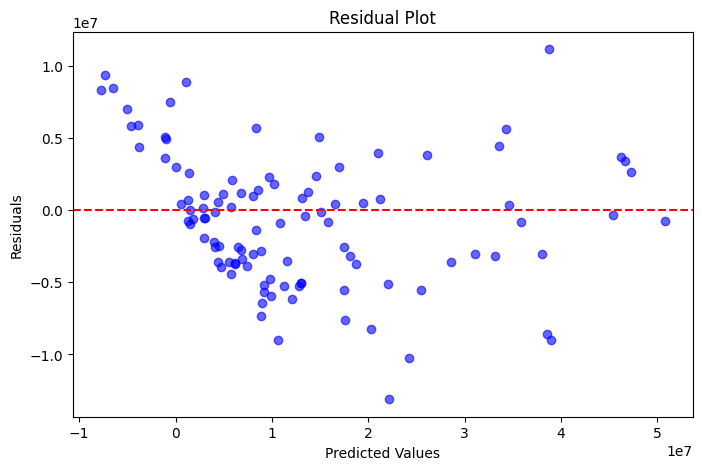

LassoRegression -> RMSE: 4670356.39, R²: 0.8752
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.9101, Test: 0.8752
🔹 MSE - Train: 21566417239245.9102, Test: 21812228774788.2852
🔹 RMSE - Train: 4643965.6802, Test: 4670356.3863
🔹 MAE - Train: 3565220.8887, Test: 3692962.3480
🔹 Cross-Validation R² (Mean): 0.8643 ± 0.0344


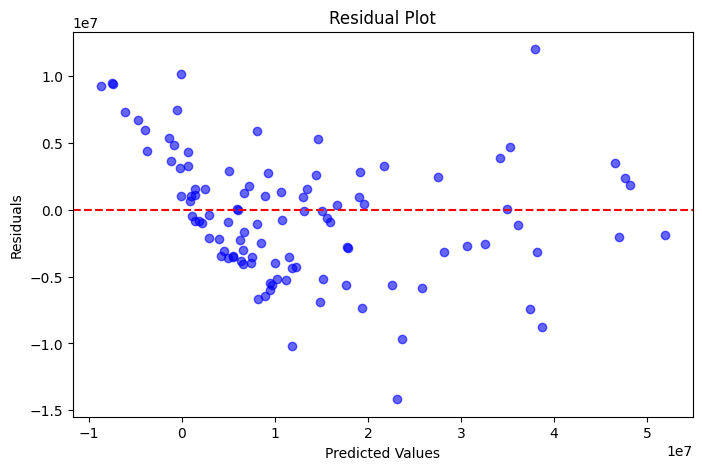

ElasticNet -> RMSE: 7009112.60, R²: 0.7188
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.7883, Test: 0.7188
🔹 MSE - Train: 50791286752031.8281, Test: 49127659462605.9688
🔹 RMSE - Train: 7126800.5972, Test: 7009112.6016
🔹 MAE - Train: 5521375.3967, Test: 5671826.1520
🔹 Cross-Validation R² (Mean): 0.7352 ± 0.0320


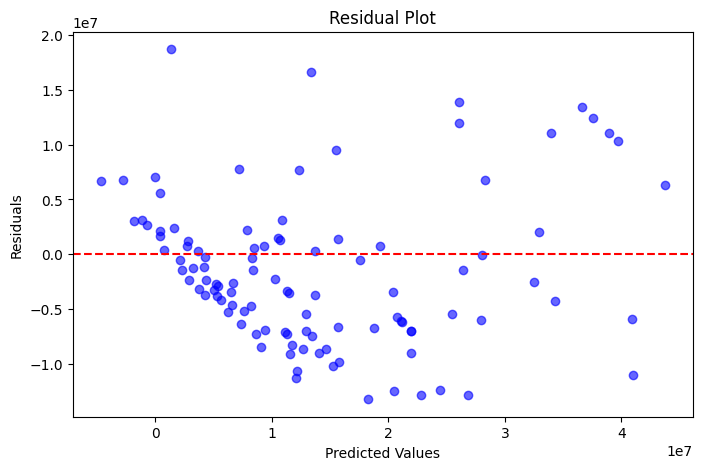

XGBoost -> RMSE: 9109464.02, R²: 0.5251
📊 Model Evaluation Results:
🔹 R² Score - Train: 1.0000, Test: 0.5251
🔹 MSE - Train: 267.9168, Test: 82982334816365.4531
🔹 RMSE - Train: 16.3682, Test: 9109464.0246
🔹 MAE - Train: 11.6049, Test: 6738954.2048
🔹 Cross-Validation R² (Mean): 0.5381 ± 0.0783


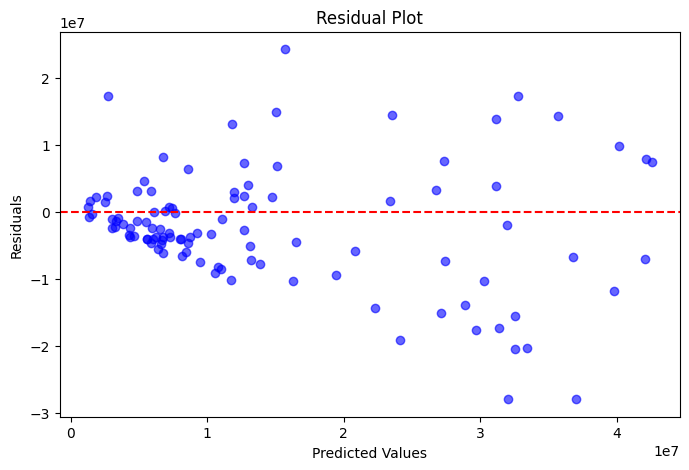

LightGBM -> RMSE: 8410946.63, R²: 0.5951
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.9610, Test: 0.5951
🔹 MSE - Train: 9347626258105.1504, Test: 70744023294534.6562
🔹 RMSE - Train: 3057388.7973, Test: 8410946.6349
🔹 MAE - Train: 2116132.3156, Test: 6301582.1010
🔹 Cross-Validation R² (Mean): 0.6141 ± 0.0502


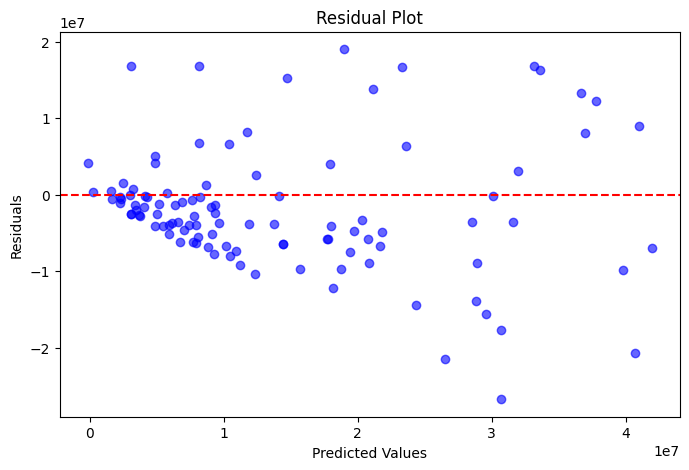

RandomForest -> RMSE: 9170403.11, R²: 0.5187
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.9280, Test: 0.5187
🔹 MSE - Train: 17273070769210.7812, Test: 84096293173252.0469
🔹 RMSE - Train: 4156088.3977, Test: 9170403.1085
🔹 MAE - Train: 3180082.6527, Test: 7316872.8268
🔹 Cross-Validation R² (Mean): 0.4991 ± 0.0543


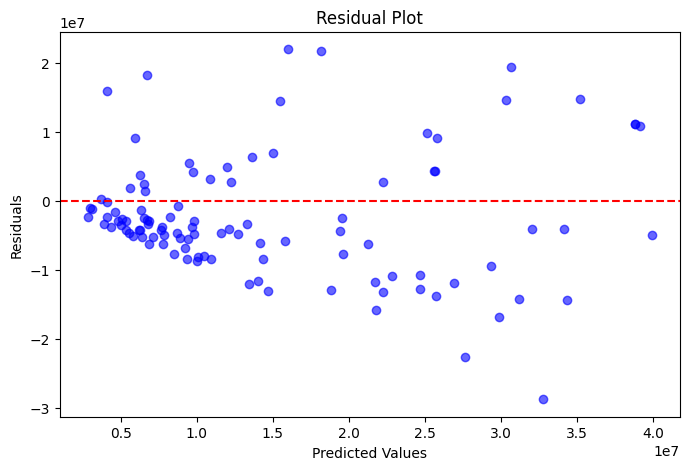

GradientBoosting -> RMSE: 8721052.66, R²: 0.5647
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.9763, Test: 0.5647
🔹 MSE - Train: 5680366318232.5752, Test: 76056759434208.7188
🔹 RMSE - Train: 2383351.9082, Test: 8721052.6563
🔹 MAE - Train: 1826991.9419, Test: 6380762.7475
🔹 Cross-Validation R² (Mean): 0.5879 ± 0.0737


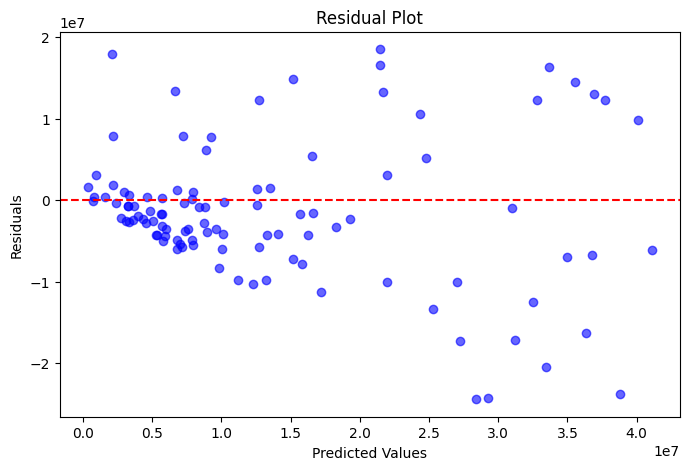

AdaBoost -> RMSE: 9266901.16, R²: 0.5085
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8050, Test: 0.5085
🔹 MSE - Train: 46784313059271.5234, Test: 85875457137933.2188
🔹 RMSE - Train: 6839905.9247, Test: 9266901.1615
🔹 MAE - Train: 6261520.8633, Test: 7912736.3057
🔹 Cross-Validation R² (Mean): 0.5555 ± 0.0751


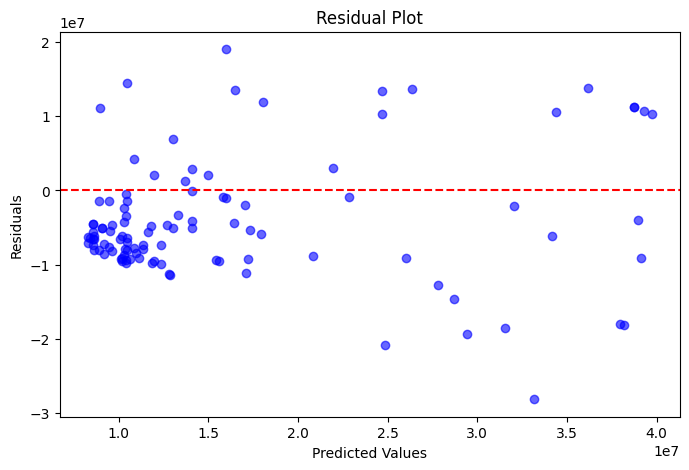


Best model for Forwards: Ridge (RMSE: 4643806.22, R²: 0.8766)

LinearRegression -> RMSE: 2856512.52, R²: 0.8615
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8831, Test: 0.8615
🔹 MSE - Train: 5557958404276.0371, Test: 8159663754964.7744
🔹 RMSE - Train: 2357532.2700, Test: 2856512.5162
🔹 MAE - Train: 1736163.8706, Test: 2189409.4638
🔹 Cross-Validation R² (Mean): 0.5007 ± 0.4126


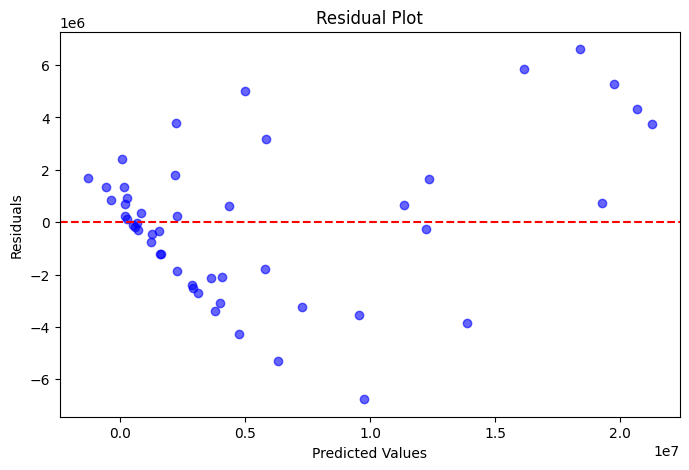

RidgeRegression -> RMSE: 2967171.38, R²: 0.8506
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8713, Test: 0.8506
🔹 MSE - Train: 6117889996968.2471, Test: 8804105988179.7031
🔹 RMSE - Train: 2473436.8795, Test: 2967171.3783
🔹 MAE - Train: 1816375.0027, Test: 2266746.1100
🔹 Cross-Validation R² (Mean): 0.6024 ± 0.2380


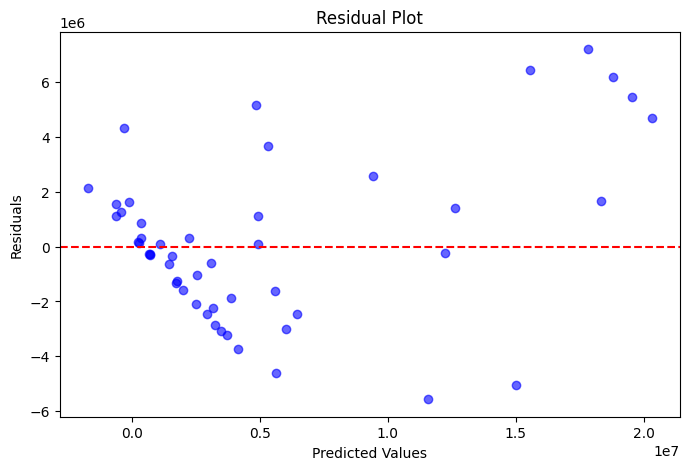

LassoRegression -> RMSE: 2811606.12, R²: 0.8658
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8815, Test: 0.8658
🔹 MSE - Train: 5632920225292.3818, Test: 7905128976452.0742
🔹 RMSE - Train: 2373377.3879, Test: 2811606.1204
🔹 MAE - Train: 1761318.7462, Test: 2183131.0757
🔹 Cross-Validation R² (Mean): 0.4971 ± 0.4054


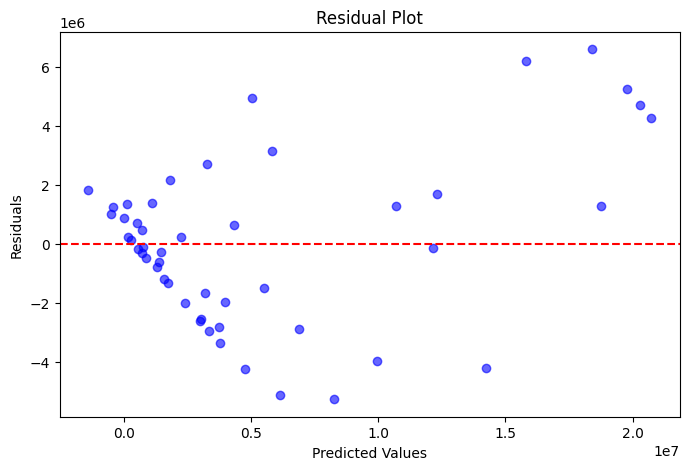

ElasticNet -> RMSE: 4112727.00, R²: 0.7129
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.6789, Test: 0.7129
🔹 MSE - Train: 15265817644459.9336, Test: 16914523401321.4941
🔹 RMSE - Train: 3907149.5549, Test: 4112727.0030
🔹 MAE - Train: 2741234.4251, Test: 2782508.5755
🔹 Cross-Validation R² (Mean): 0.4836 ± 0.1150


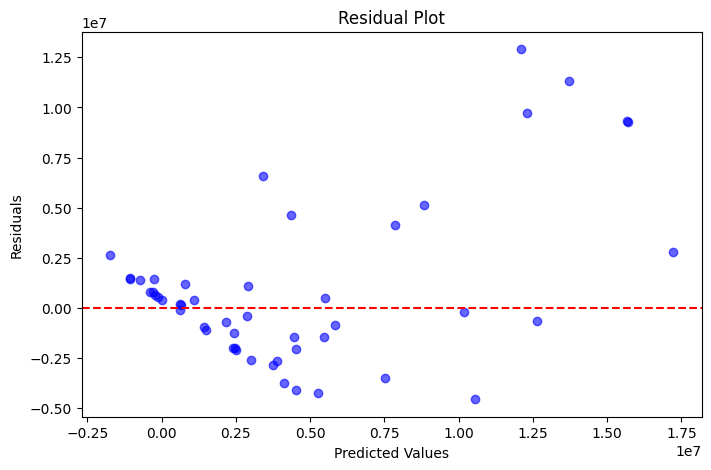

XGBoost -> RMSE: 4368090.99, R²: 0.6761
📊 Model Evaluation Results:
🔹 R² Score - Train: 1.0000, Test: 0.6761
🔹 MSE - Train: 12.2426, Test: 19080218932573.2773
🔹 RMSE - Train: 3.4989, Test: 4368090.9941
🔹 MAE - Train: 2.4657, Test: 2579753.0287
🔹 Cross-Validation R² (Mean): 0.3178 ± 0.3655


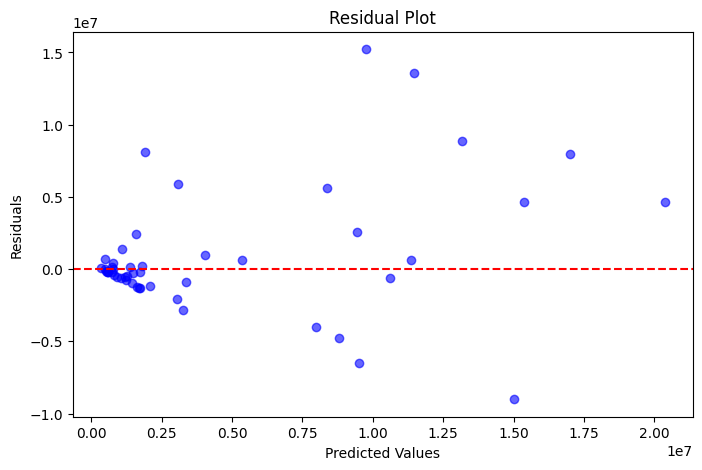

LightGBM -> RMSE: 4498725.42, R²: 0.6565
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.9205, Test: 0.6565
🔹 MSE - Train: 3780548221077.5396, Test: 20238530380764.2734
🔹 RMSE - Train: 1944363.1917, Test: 4498725.4174
🔹 MAE - Train: 1293166.4867, Test: 3038954.3466
🔹 Cross-Validation R² (Mean): 0.5328 ± 0.1743


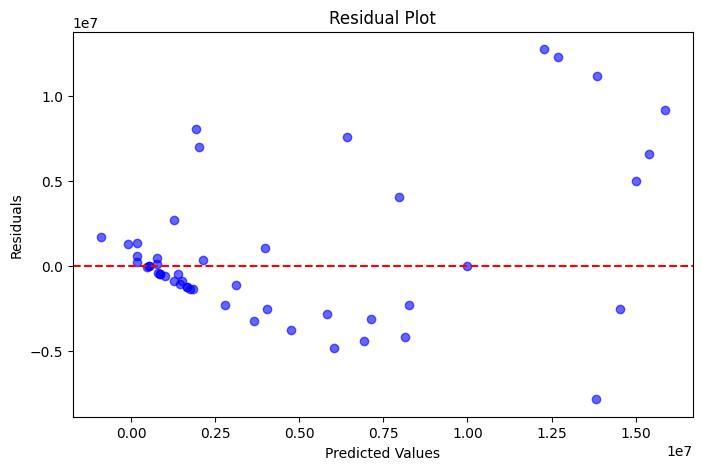

RandomForest -> RMSE: 3911376.91, R²: 0.7403
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.9376, Test: 0.7403
🔹 MSE - Train: 2965851984294.9873, Test: 15298869312709.8242
🔹 RMSE - Train: 1722164.9120, Test: 3911376.9075
🔹 MAE - Train: 1119863.0755, Test: 2424473.6738
🔹 Cross-Validation R² (Mean): 0.5013 ± 0.1101


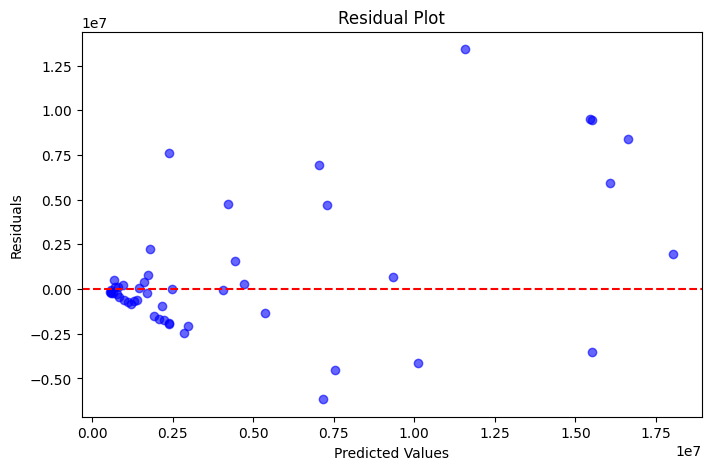

GradientBoosting -> RMSE: 4024565.30, R²: 0.7251
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.9959, Test: 0.7251
🔹 MSE - Train: 196261871570.3237, Test: 16197125893287.3438
🔹 RMSE - Train: 443014.5275, Test: 4024565.3049
🔹 MAE - Train: 338093.7069, Test: 2546731.3892
🔹 Cross-Validation R² (Mean): 0.4441 ± 0.1959


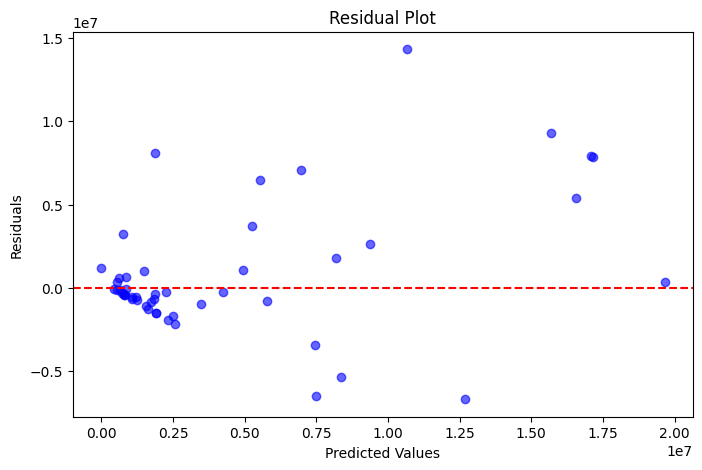

AdaBoost -> RMSE: 4278277.93, R²: 0.6893
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8938, Test: 0.6893
🔹 MSE - Train: 5048552614175.5107, Test: 18303662052838.2617
🔹 RMSE - Train: 2246898.4432, Test: 4278277.9308
🔹 MAE - Train: 2037919.3599, Test: 3470499.3550
🔹 Cross-Validation R² (Mean): 0.4530 ± 0.1752


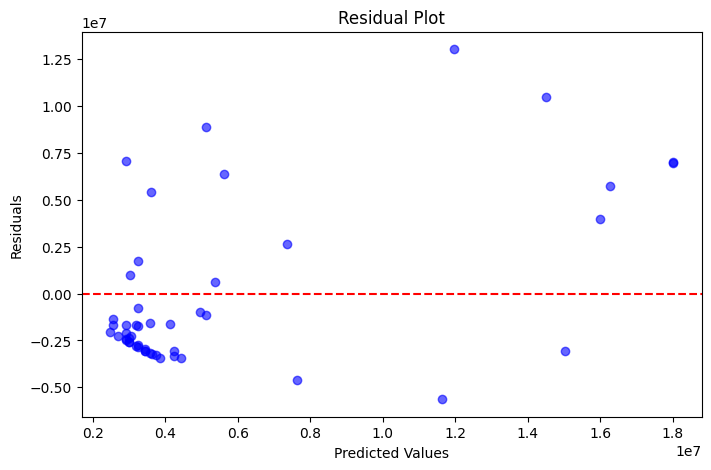


Best model for Goalkeepers: Lasso (RMSE: 2811606.12, R²: 0.8658)



{'Defenders': Lasso(),
 'Midfielders': LinearRegression(),
 'Forwards': Ridge(),
 'Goalkeepers': Lasso()}

In [25]:
pca_on_individual_model(reduced_df)

---


## PCA + Ensemble Learning


Stacking Ensemble -> RMSE: 4923716.28, R²: 0.8641
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8971, Test: 0.8641
🔹 MSE - Train: 18672590835562.0586, Test: 24242981958070.4375
🔹 RMSE - Train: 4321179.3339, Test: 4923716.2751
🔹 MAE - Train: 2826839.5700, Test: 3383759.6450
🔹 Cross-Validation R² (Mean): 0.8583 ± 0.0191


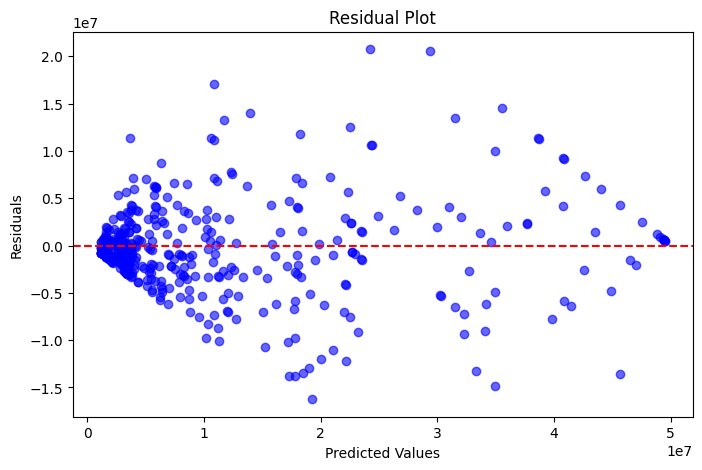

Bagging Ensemble -> RMSE: 8673389.11, R²: 0.5783
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8597, Test: 0.5783
🔹 MSE - Train: 25457676342292.4141, Test: 75227678676503.5781
🔹 RMSE - Train: 5045560.0623, Test: 8673389.1113
🔹 MAE - Train: 3597954.6296, Test: 6327642.7208
🔹 Cross-Validation R² (Mean): 0.6093 ± 0.0153


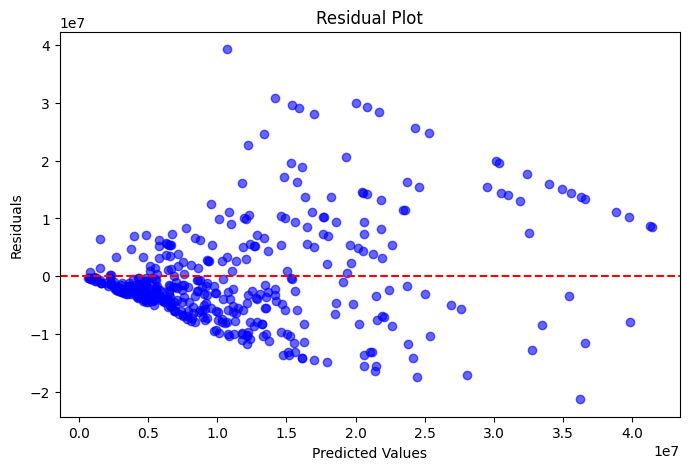

Boosting Ensemble -> RMSE: 7236332.17, R²: 0.7065
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.9724, Test: 0.7065
🔹 MSE - Train: 5014677676244.6377, Test: 52364503206193.6484
🔹 RMSE - Train: 2239347.6006, Test: 7236332.1653
🔹 MAE - Train: 1649987.9893, Test: 4940232.0730
🔹 Cross-Validation R² (Mean): 0.7214 ± 0.0247


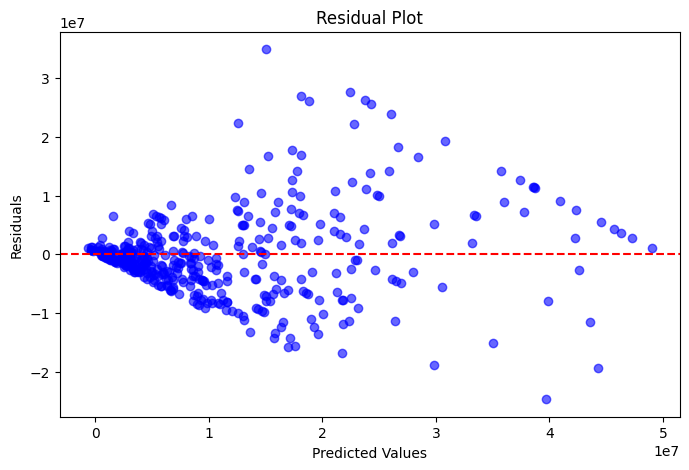

(VotingRegressor(estimators=[('XGBoost',
                              XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True, eta=0.1,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           le...
                                           max_cat_to_onehot=None,
                                           max_delta_step=

In [26]:
train_and_evaluate_ensemble(reduced_df, method="stacking")
train_and_evaluate_ensemble(reduced_df, method="bagging")
train_and_evaluate_ensemble(reduced_df, method="boosting")

---


Stacking Ensemble -> RMSE: 4923716.28, R²: 0.8641
📊 Model Evaluation Results:
🔹 R² Score - Train: 0.8971, Test: 0.8641
🔹 MSE - Train: 18672590835562.0586, Test: 24242981958070.4375
🔹 RMSE - Train: 4321179.3339, Test: 4923716.2751
🔹 MAE - Train: 2826839.5700, Test: 3383759.6450
🔹 Cross-Validation R² (Mean): 0.8583 ± 0.0191


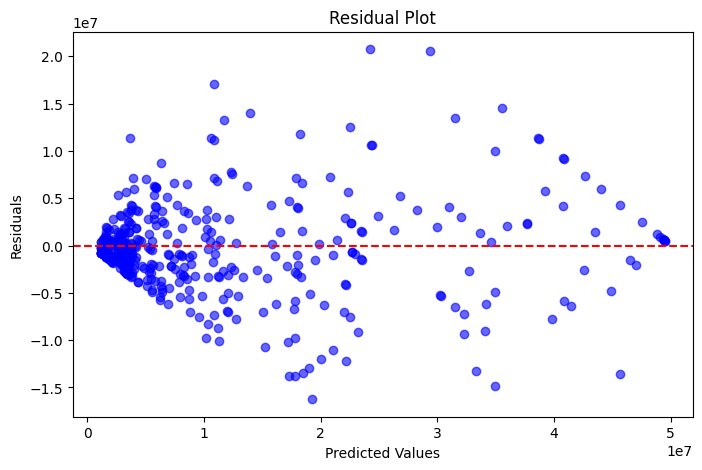

In [43]:
import shap
from sklearn.metrics import classification_report, confusion_matrix

model, X_train, X_test, y_test = train_and_evaluate_ensemble(
    reduced_df, method="stacking")


In [ ]:
explainer = shap.Explainer(model.predict, X_train)

shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

In [46]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "football_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)